In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from xgboost import XGBClassifier


### Reading CSV files

In [3]:
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

In [4]:
df_2014.shape

(3808, 225)

In [5]:
df_2015.shape

(4120, 225)

In [6]:
df_2016.shape

(4797, 225)

In [7]:
df_2017.shape

(4960, 225)

In [8]:
df_2018.shape

(4392, 225)

In [9]:
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [10]:
df_2014.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [11]:
df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2015.rename(columns={'2016 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2016.rename(columns={'2017 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2017.rename(columns={'2018 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2018.rename(columns={'2019 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [12]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis = 0)

In [13]:
df.shape

(22077, 226)

In [14]:
df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class', 'Year'],
      dtype='object', length=226)

In [15]:
df['Unnamed: 0'].head(10)

0      PG
1    VIPS
2      KR
3     RAD
4     GIS
5      PM
6      KO
7     WMT
8    MDLZ
9      MO
Name: Unnamed: 0, dtype: object

In [16]:
df.rename(columns={"Unnamed: 0":"Name"}, inplace=True)

In [17]:
df.Name.nunique()

4980

In [18]:
df.loc[(df.Name=="PG")]

,Name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,2014
0,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,...,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,2015
0,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,...,-0.0528,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,12.532463,1,2016
0,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,...,-0.0195,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,4.975151,1,2017
26,PG,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,...,0.0247,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,40.680273,1,2018


In [19]:
df.shape

(22077, 226)

In [20]:
df.info

<bound method DataFrame.info of       Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0       PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1     VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2       KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3      RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4      GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...    ...           ...             ...              ...           ...   
4387  YRIV  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388  YTEN  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389  ZKIN  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
4390   ZOM  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4391  ZYME  5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Inc

In [21]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class,Year
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,...,19952.000000,19650.000000,19690.000000,19213.000000,19462.000000,19598.000000,19655.000000,2.207700e+04,22077.000000,22077.000000
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,...,10.978239,0.158858,1.134221,0.783208,3.733922,0.295610,0.365149,2.698893e+02,0.550754,2016.090954
std,3.197314e+10,312.648170,2.583092e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,...,1101.098165,3.268154,45.381079,66.524006,174.864701,12.974127,15.030054,1.934617e+04,0.497429,1.374340
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-3963.131200,-1.051000,-2.662200,-2.369900,-1.003972e+02,0.000000,2014.000000
25%,5.880737e+07,-0.014700,3.211750e+06,3.035575e+07,0.000000e+00,1.768550e+07,3.564150e+07,-4.433750e+06,0.000000e+00,-8.745000e+06,...,-0.051125,0.000000,-0.031075,-0.103800,-0.067475,0.000000,-0.013700,-1.947409e+01,0.000000,2015.000000
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.009500,0.000000,0.048000,0.032400,0.000000,0.000000,0.061000,3.909087e+00,1.000000,2016.000000
75%,2.287259e+09,0.182400,1.180224e+09,8.806035e+08,1.220150e+07,3.699722e+08,6.210870e+08,2.554363e+08,4.969325e+07,1.964680e+08,...,0.200550,0.058400,0.176800,0.142100,0.150075,0.000000,0.185350,2.750567e+01,1.000000,2017.000000
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,2042.000000,2.418601e+06,1.000000,2018.000000


In [22]:
## Removing "Year" because our future companies will have different years and it should not affect our final call
df.drop("Year", axis=1, inplace=True)

In [23]:
## Removing "Name" because our future companies will have different Name and it should not affect our final call
df.drop("Name", axis=1, inplace=True)

In [24]:
df.head(2)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0


### Understanding Null Value Distribution

In [25]:
df.isnull().sum().sort_values(ascending=False)

cashConversionCycle                           22058
operatingCycle                                22058
shortTermCoverageRatios                       10744
10Y Shareholders Equity Growth (per Share)     9680
10Y Revenue Growth (per Share)                 9532
                                              ...  
Net cash flow / Change in cash                 1018
Financing Cash Flow                             972
Sector                                            0
Next_Year_Price_Var[%]                            0
Class                                             0
Length: 224, dtype: int64

In [26]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

cashConversionCycle                           99.913938
operatingCycle                                99.913938
shortTermCoverageRatios                       48.666033
10Y Shareholders Equity Growth (per Share)    43.846537
10Y Revenue Growth (per Share)                43.176156
                                                ...    
Net cash flow / Change in cash                 4.611134
Financing Cash Flow                            4.402772
Sector                                         0.000000
Next_Year_Price_Var[%]                         0.000000
Class                                          0.000000
Length: 224, dtype: float64

In [27]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=True).head(15)

Class                             0.000000
Sector                            0.000000
Next_Year_Price_Var[%]            0.000000
Financing Cash Flow               4.402772
Net cash flow / Change in cash    4.611134
Operating Income                  4.987091
Receivables                       5.005209
Retained earnings (deficit)       5.286044
Operating Cash Flow               5.290574
Revenue                           5.304163
Cash and cash equivalents         5.340400
Earnings Before Tax Margin        5.412873
Gross Margin                      5.430992
Gross Profit                      5.467228
EPS Diluted                       5.852244
dtype: float64

In [28]:
# all cols have some null values
len(df.isnull().any())

224

In [29]:
# No columns with all null values
df.columns[df.isnull().all()]

Index([], dtype='object')

In [30]:
# Defining a funtion to add the count/frequency values as annotation to histogram.
def annotate_graph(ax):
    for bar in ax.patches:         
        ax.annotate(format((bar.get_height()), '.0f'),                    
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()),                    
                    ha='center', va='center',                    
                    size=10, xytext=(0, 8),                    
                    textcoords='offset points')
    return ax

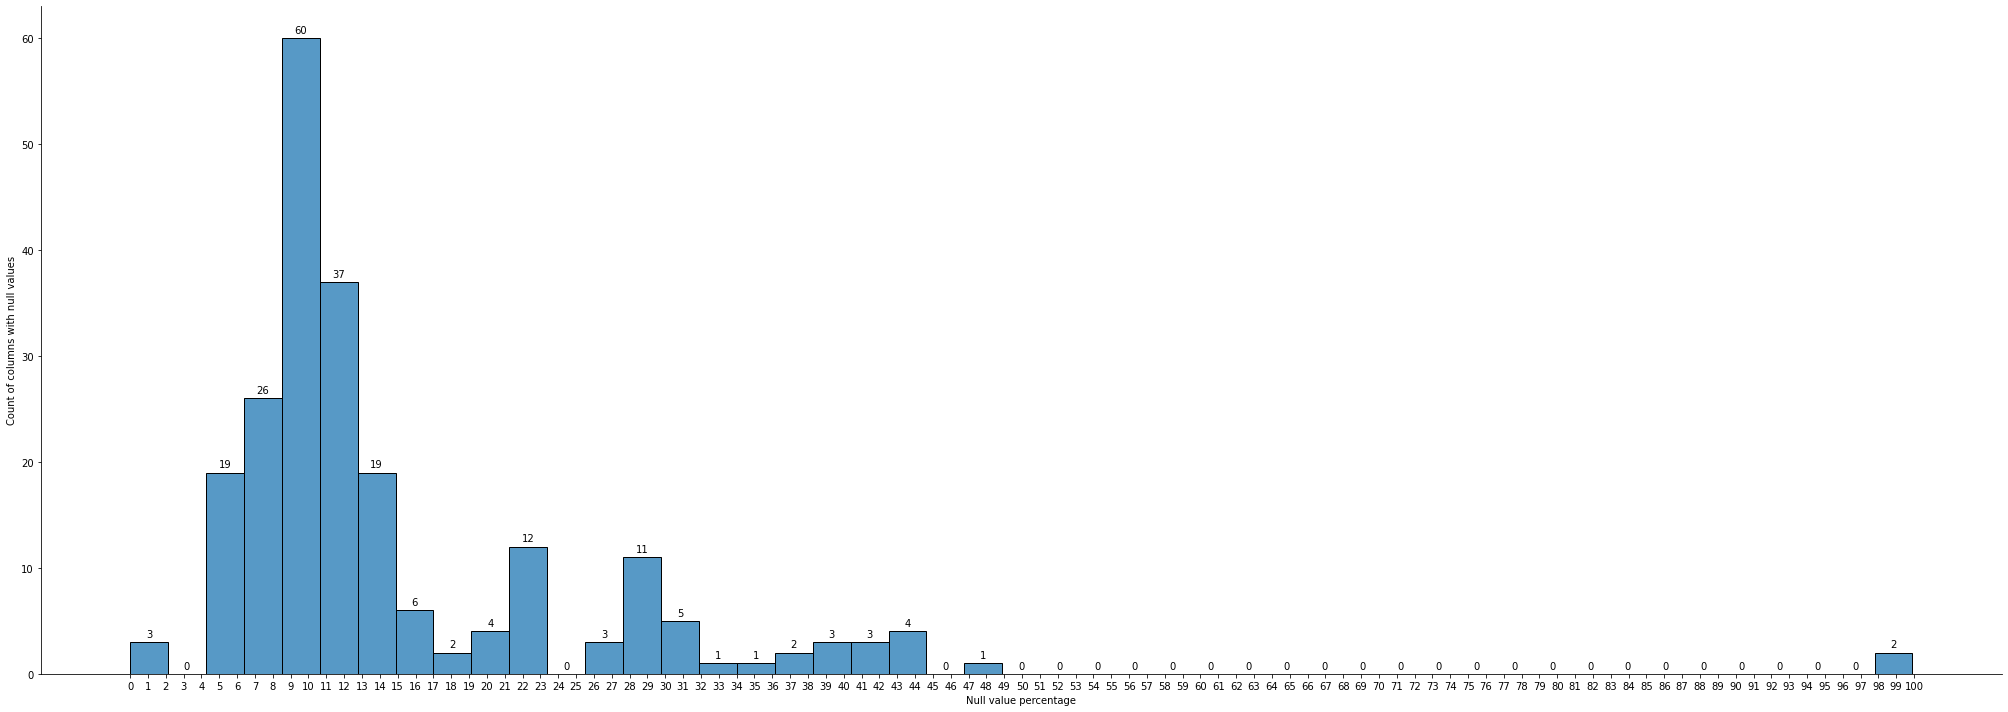

In [31]:
# Plotting histogram for the dataframe and columns having null values.
plt.figure(figsize=(28,10))

ax = sns.histplot(round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
ax = annotate_graph(ax)

ax.set(xticks=np.arange(0,101))
ax.set(xlabel='Null value percentage', ylabel='Count of columns with null values')
sns.despine()
plt.tight_layout()

<AxesSubplot:>

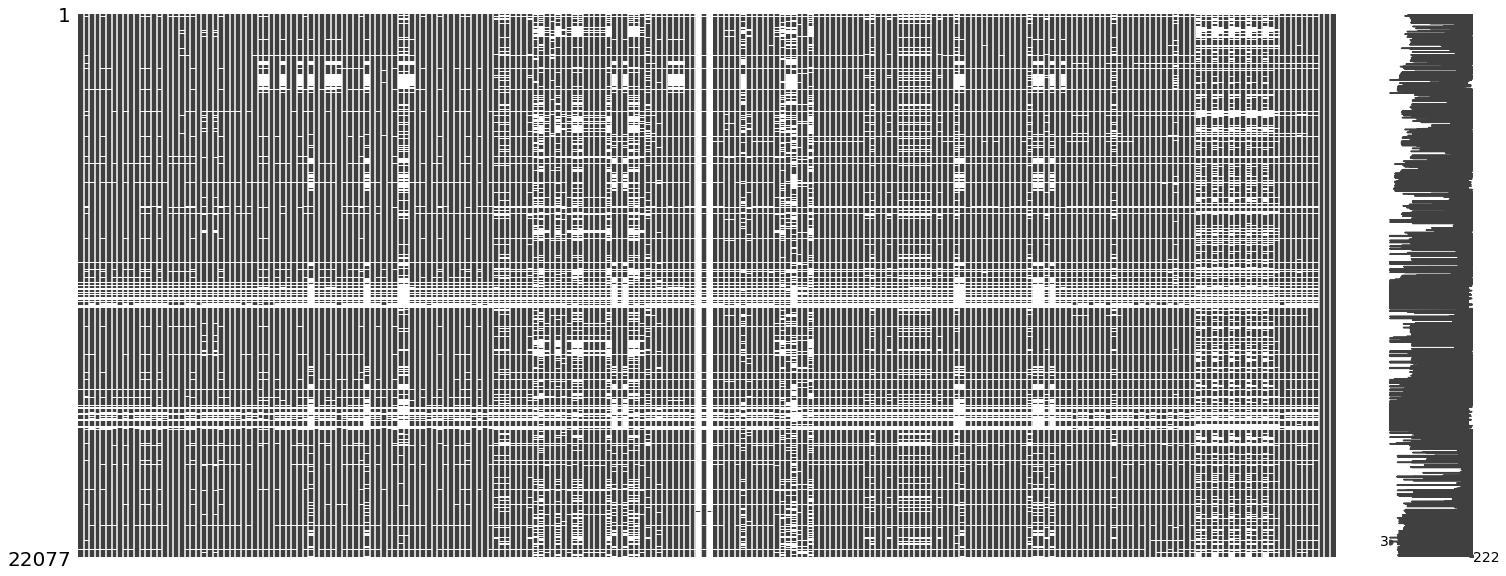

In [32]:
msno.matrix(df)

In [33]:
# defining a function to get more than cutoff percent missing value

def get_missing_value_percentage(cutoff):
    y = pd.DataFrame( round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
    y.rename(columns={0:"Percentage"}, inplace=True)
    y2 = y[y.Percentage>cutoff]
    return y2

In [34]:
# get columns with more than 70% missing values
greater_than_70 = get_missing_value_percentage(70)

In [35]:
len(greater_than_70)

2

In [36]:
greater_than_70

,Percentage
cashConversionCycle,99.91
operatingCycle,99.91


In [37]:
# get columns with more than 50% missing values
greater_than_50 = get_missing_value_percentage(50)

In [38]:
len(greater_than_50)

2

In [39]:
greater_than_50

,Percentage
cashConversionCycle,99.91
operatingCycle,99.91


In [40]:
# get columns with more than 20% missing values
greater_than_20 = get_missing_value_percentage(20)
greater_than_20

,Percentage
cashConversionCycle,99.91
operatingCycle,99.91
shortTermCoverageRatios,48.67
10Y Shareholders Equity Growth (per Share),43.85
10Y Revenue Growth (per Share),43.18
10Y Net Income Growth (per Share),43.18
10Y Operating CF Growth (per Share),42.93
10Y Dividend per Share Growth (per Share),41.57
priceEarningsToGrowthRatio,41.12
dividendPayoutRatio,41.12


### Removing Null Values

In [41]:
# function to drop cols which have more than 15% null values

def remove_cols_with_nulls (df, threshold):
    myCol = list(df.columns)
    for col in myCol: 
        percentage = (df[col].isnull().sum()/len(df[col]))*100
        if percentage>threshold:
            df.drop(col, axis=1, inplace=True)

In [42]:
df.shape

(22077, 224)

In [43]:
remove_cols_with_nulls(df, 20)

In [44]:
df.shape

(22077, 172)

In [45]:
len(df.columns[(df.isnull().any())])

169

In [46]:
# Deleting rows with any null value
df.dropna(how='all',axis=0, inplace=True) 

In [47]:
# Therefore, there is no row will all NULL values
df.shape

(22077, 172)

In [48]:
# Deleting rows with any null value
df.dropna(how='any',axis=0, inplace=True) 

In [49]:
df.shape

(12804, 172)

<AxesSubplot:>

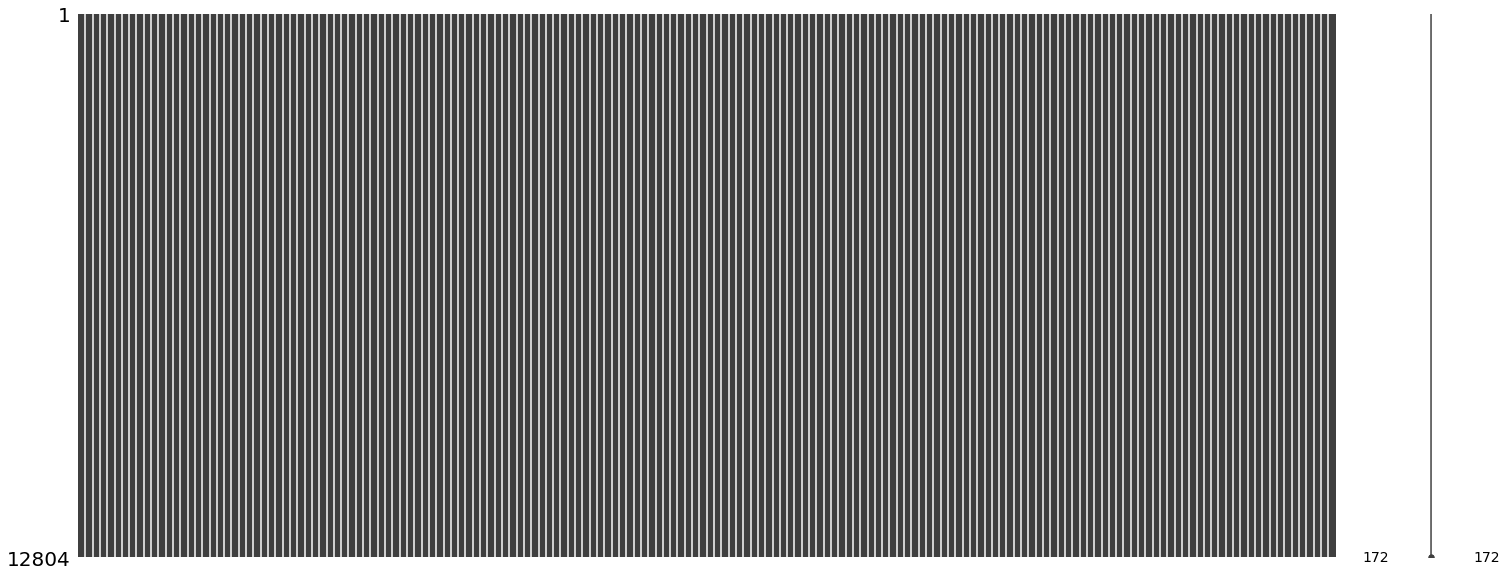

In [50]:
msno.matrix(df)

In [51]:
df.isnull().any().sum()

0

In [52]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', 'Next_Year_Price_Var[%]', 'Class'],
      dtype='object', length=172)

In [53]:
df.select_dtypes('number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,0.0,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,...,0.0908,-0.0835,-0.0540,0.0219,-0.0763,0.1258,0.0000,-0.0053,5.339413,1
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,0.0,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,...,-0.1547,-0.1907,-0.1619,-0.0113,-0.0567,0.0349,0.0000,-0.1036,-38.548749,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.0,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0.3154,0.1295,0.0352,0.0815,-0.0658,0.3515,0.0000,0.0579,18.603845,1
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,122000000.0,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0.0291,0.0551,0.0984,-0.0252,0.3269,-0.0984,-0.0469,-0.0733,22.628763,1
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,0.0,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,...,0.1619,0.1052,0.0894,0.1098,0.0912,0.0000,0.0000,0.0376,58.666783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,6.966000e+06,0.1192,0.000000e+00,6.966000e+06,0.0,2.804000e+06,3.673000e+06,3.293000e+06,0.000000e+00,3.253000e+06,...,0.2599,0.0000,0.0000,0.0019,0.0559,-0.0029,0.0000,-0.0018,11.671183,1
4382,2.307974e+07,0.1068,8.298240e+06,1.478150e+07,0.0,1.059878e+07,1.059878e+07,4.182715e+06,4.576890e+05,3.939586e+06,...,0.0000,0.3368,0.0983,0.0299,0.0674,-0.0666,0.0000,0.1463,-3.076927,0
4385,3.546600e+07,0.1186,2.702000e+06,3.276400e+07,0.0,2.446700e+07,2.883400e+07,3.930000e+06,1.011000e+06,2.919000e+06,...,0.0000,0.2910,0.0000,0.0225,0.0348,-0.2154,0.0000,0.0276,27.118650,1
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4759000.0,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.0000,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,-77.922077,0


In [54]:
df['R&D Expenses'].value_counts()

0.0            7956
6469000.0         3
105000000.0       3
106000000.0       3
73100000.0        3
               ... 
32220000.0        1
23138050.0        1
19147000.0        1
3659000.0         1
5570029.0         1
Name: R&D Expenses, Length: 4709, dtype: int64

In [55]:
df.shape[0]

12804

In [56]:
df['R&D Expenses'].value_counts(normalize=True).sort_values(ascending=False)[0]

0.6213683223992502

In [57]:
# more than 50% value of R&D expense is 0. Remove numeric cols with dominant values

In [58]:
df.operatingProfitMargin.value_counts().sort_values(ascending=False).iloc[0]

12804

In [59]:
#Code goes to except block when single value is met ---> which is SERIES and you cannot do simple indexing in SERIES

In [60]:
counter = 0
for col in list(df.select_dtypes('number').columns):
    try:  
        val = df[col].value_counts(normalize=True).sort_values(ascending=False)[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
    except:
        val = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
        
    
print("Total Columns Deleted = ",counter)

Total Columns Deleted =  19


In [61]:
df.shape

(12804, 153)

In [62]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       'Free Cash Flow growth', 'Receivables growth', 'Inventory Growth',
       'Asset Growth', 'Book Value per Share Growth', 'Debt Growth',
       'SG&A Expenses Growth', 'Sector', 'Next_Year_Price_Var[%]', 'Class'],
      dtype='object', length=153)

In [63]:
df.select_dtypes(include='number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,2.201000e+09,...,0.0069,0.0406,-0.0835,-0.0540,0.0219,-0.0763,0.1258,-0.0053,5.339413,1
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,1.324071e+08,...,-0.9987,-0.9983,-0.1907,-0.1619,-0.0113,-0.0567,0.0349,-0.1036,-38.548749,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,8.910000e+07,...,0.0478,0.0111,0.1295,0.0352,0.0815,-0.0658,0.3515,0.0579,18.603845,1
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,3.740000e+08,...,-0.1178,-0.1657,0.0551,0.0984,-0.0252,0.3269,-0.0984,-0.0733,22.628763,1
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,3.161260e+08,...,0.1710,0.1050,0.1052,0.0894,0.1098,0.0912,0.0000,0.0376,58.666783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,6.966000e+06,0.1192,0.000000e+00,6.966000e+06,2.804000e+06,3.673000e+06,3.293000e+06,0.000000e+00,3.253000e+06,1.128000e+06,...,0.5780,0.5774,0.0000,0.0000,0.0019,0.0559,-0.0029,-0.0018,11.671183,1
4382,2.307974e+07,0.1068,8.298240e+06,1.478150e+07,1.059878e+07,1.059878e+07,4.182715e+06,4.576890e+05,3.939586e+06,1.081006e+06,...,-0.0868,-1.1225,0.3368,0.0983,0.0299,0.0674,-0.0666,0.1463,-3.076927,0
4385,3.546600e+07,0.1186,2.702000e+06,3.276400e+07,2.446700e+07,2.883400e+07,3.930000e+06,1.011000e+06,2.919000e+06,1.831000e+06,...,0.4097,0.1450,0.2910,0.0000,0.0225,0.0348,-0.2154,0.0276,27.118650,1
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,0.000000e+00,...,-0.0673,-0.0716,0.3445,0.0000,-0.2323,-0.8602,0.0000,-0.0993,-77.922077,0


In [64]:
df.select_dtypes(include='object')

,Sector
6,Consumer Defensive
12,Consumer Defensive
14,Consumer Defensive
16,Consumer Defensive
18,Consumer Defensive
...,...
4381,Financial Services
4382,Consumer Defensive
4385,Consumer Cyclical
4388,Basic Materials


In [65]:
df.select_dtypes(include='number').shape

(12804, 152)

In [66]:
df.select_dtypes(include='object').shape

(12804, 1)

In [67]:
df.select_dtypes(include='category').shape

(12804, 0)

In [68]:
df.shape

(12804, 153)

In [69]:
# 155 cols ----> 154 number, 1 Object

In [70]:
df.Sector.value_counts()

Technology                2392
Industrials               2001
Healthcare                1878
Financial Services        1622
Consumer Cyclical         1609
Energy                     752
Basic Materials            732
Consumer Defensive         618
Real Estate                599
Utilities                  374
Communication Services     227
Name: Sector, dtype: int64

In [71]:
sector_list = list(df.Sector.unique())

In [72]:
sector_list

['Consumer Defensive',
 'Basic Materials',
 'Healthcare',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Communication Services',
 'Energy',
 'Financial Services',
 'Utilities',
 'Technology']

In [73]:
pd.get_dummies(df.Sector, drop_first=True)

,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
6,0,0,1,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0
14,0,0,1,0,0,0,0,0,0,0
16,0,0,1,0,0,0,0,0,0,0
18,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4381,0,0,0,0,1,0,0,0,0,0
4382,0,0,1,0,0,0,0,0,0,0
4385,0,1,0,0,0,0,0,0,0,0
4388,0,0,0,0,0,0,0,0,0,0


In [74]:
Sector_status = pd.get_dummies(df.Sector, drop_first=True)

#Adding the result to the original housing dataframe

df = pd.concat([df, Sector_status], axis=1)


In [75]:
df.shape

(12804, 163)

In [76]:
df.Energy.value_counts()

0    12052
1      752
Name: Energy, dtype: int64

In [77]:
# Sector Column will be dropped after Exploratory Data Analysis

In [78]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,2.201000e+09,...,0,0,1,0,0,0,0,0,0,0
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,1.324071e+08,...,0,0,1,0,0,0,0,0,0,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,8.910000e+07,...,0,0,1,0,0,0,0,0,0,0
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,3.740000e+08,...,0,0,1,0,0,0,0,0,0,0
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,3.161260e+08,...,0,0,1,0,0,0,0,0,0,0


# Removing columns with single value

In [79]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if (length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [80]:
for col in df.columns:
    removeSingleValue(col)

In [81]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [82]:
len(num_col)

162

In [83]:
df.shape

(12804, 163)

### Duplicate Row Checker

In [84]:
df.duplicated().sum()

0

In [85]:
# Moving "Class" Column to end
df['Result'] = df.Class
df.drop("Class", axis=1, inplace=True)
df = df.rename(columns={"Result":"Class"})

In [86]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,2.201000e+09,...,0,1,0,0,0,0,0,0,0,1
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,1.324071e+08,...,0,1,0,0,0,0,0,0,0,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,8.910000e+07,...,0,1,0,0,0,0,0,0,0,1
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,3.740000e+08,...,0,1,0,0,0,0,0,0,0,1
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,3.161260e+08,...,0,1,0,0,0,0,0,0,0,1


# Exploratory Data Analysis

In [87]:
# Get number of positve and negative examples
pos = df[df["Class"] == 1].shape[0]
neg = df[df["Class"] == 0].shape[0]

print("Profitable Companies = ",pos)
print("Lossy Companies = ",neg)

Profitable Companies =  7166
Lossy Companies =  5638


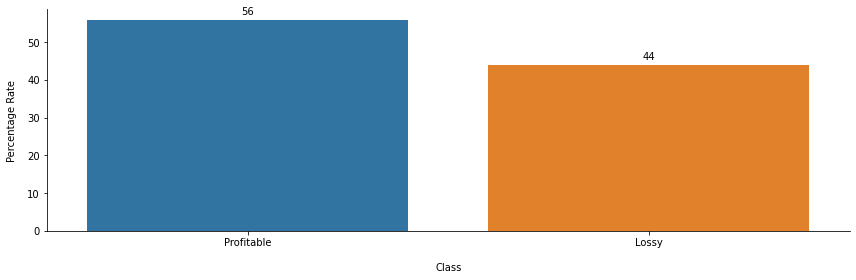

In [88]:
# Plotting the profitable vs non-profitable customers.
plt.figure(figsize = (12, 4))

length = len(df)
ax = sns.barplot(x = ['Profitable','Lossy'], y = [pos/length * 100,neg/length * 100])
plt.xlabel("Class", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
annotate_graph(ax)


sns.despine()
plt.tight_layout()
plt.show()

In [89]:
corr_df = pd.DataFrame(df.corr()['Class'].sort_values(ascending = False))

In [90]:
positive_corr = corr_df.loc[(corr_df.Class>0) & (corr_df.Class<1)]

In [91]:
negative_corr = corr_df.loc[corr_df.Class<0]

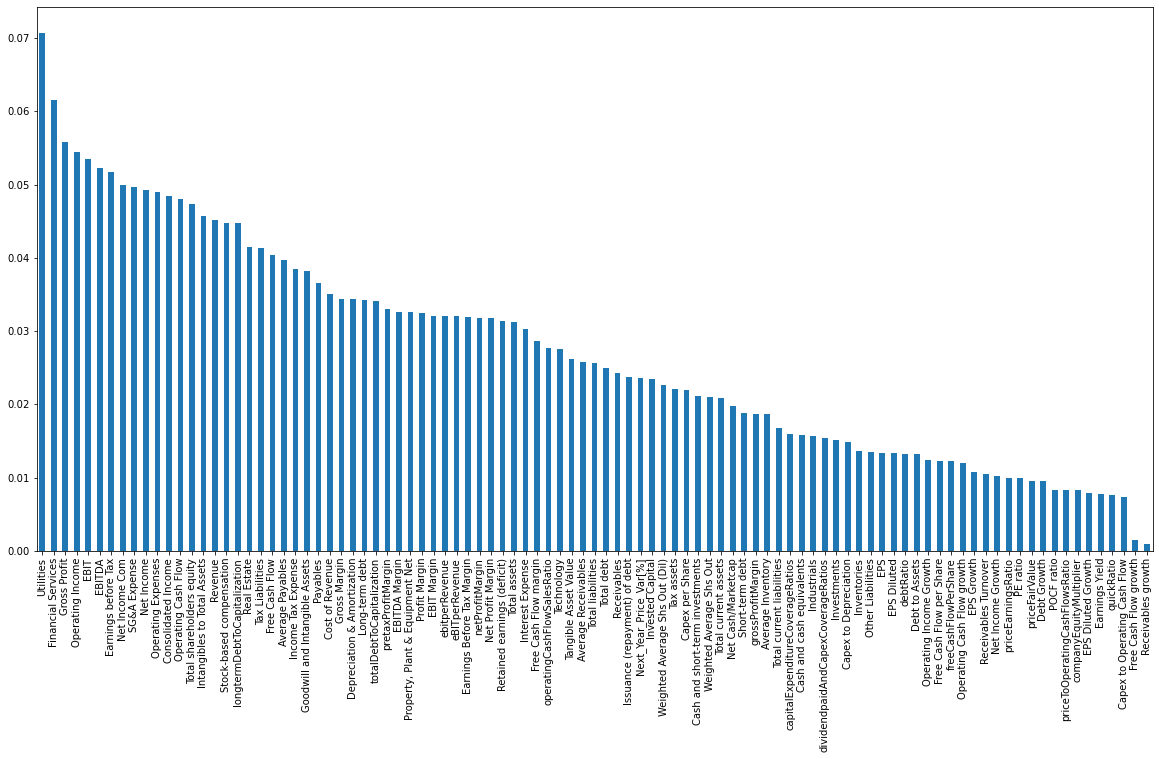

In [92]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
positive_corr.Class.plot(kind = 'bar')
plt.show()

In [93]:
positive_corr=positive_corr.reset_index()

In [94]:
positive_corr

,index,Class
0,Utilities,0.070709
1,Financial Services,0.061592
2,Gross Profit,0.055863
3,Operating Income,0.054420
4,EBIT,0.053519
...,...,...
92,Earnings Yield,0.007706
93,quickRatio,0.007637
94,Capex to Operating Cash Flow,0.007286
95,Free Cash Flow growth,0.001503


In [95]:
positive_corr = positive_corr.rename(columns={"index":"col_name"})

In [96]:
positive_corr

,col_name,Class
0,Utilities,0.070709
1,Financial Services,0.061592
2,Gross Profit,0.055863
3,Operating Income,0.054420
4,EBIT,0.053519
...,...,...
92,Earnings Yield,0.007706
93,quickRatio,0.007637
94,Capex to Operating Cash Flow,0.007286
95,Free Cash Flow growth,0.001503


In [97]:
top_pos_index = list(positive_corr.col_name[0:6])

In [98]:
top_pos_index

['Utilities',
 'Financial Services',
 'Gross Profit',
 'Operating Income',
 'EBIT',
 'EBITDA']

In [99]:
top_pos_index.remove("Utilities")
top_pos_index.remove("Financial Services")

In [100]:
printThis = df[top_pos_index]
printThis['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

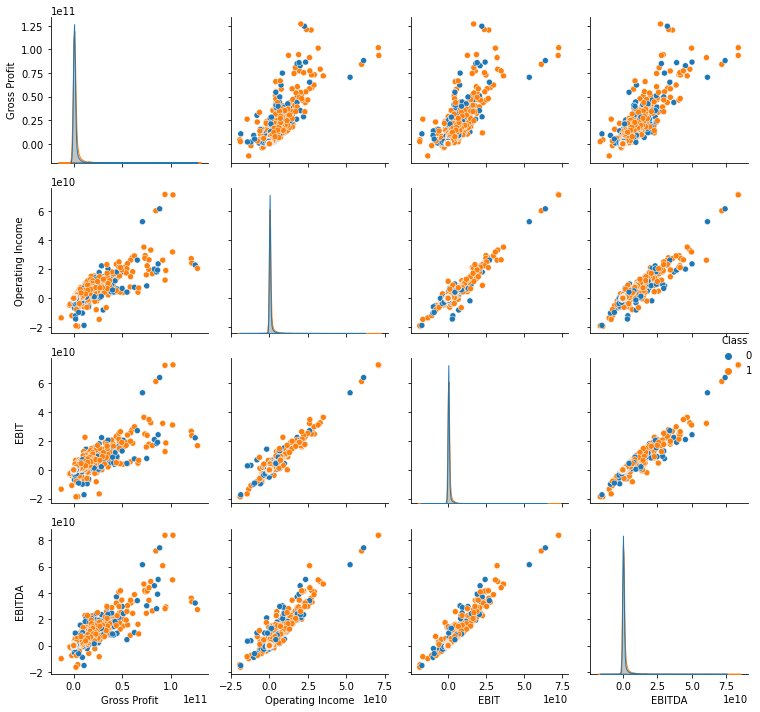

In [101]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

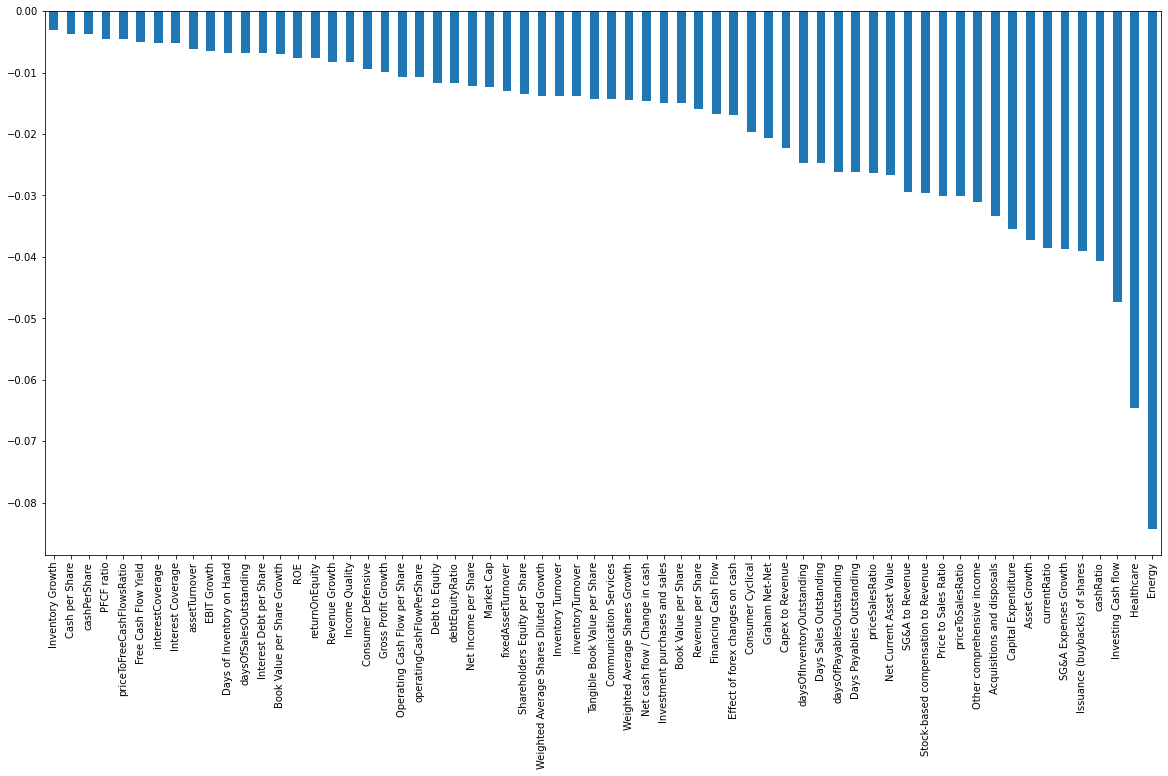

In [102]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
negative_corr.Class.plot(kind = 'bar')
plt.show()

In [103]:
negative_corr=negative_corr.reset_index()

In [104]:
negative_corr

,index,Class
0,Inventory Growth,-0.003079
1,Cash per Share,-0.003748
2,cashPerShare,-0.003748
3,PFCF ratio,-0.004530
4,priceToFreeCashFlowsRatio,-0.004530
...,...,...
59,Issuance (buybacks) of shares,-0.039013
60,cashRatio,-0.040676
61,Investing Cash flow,-0.047338
62,Healthcare,-0.064507


In [105]:
negative_corr = negative_corr.rename(columns={"index":"col_name"})

In [106]:
negative_corr

,col_name,Class
0,Inventory Growth,-0.003079
1,Cash per Share,-0.003748
2,cashPerShare,-0.003748
3,PFCF ratio,-0.004530
4,priceToFreeCashFlowsRatio,-0.004530
...,...,...
59,Issuance (buybacks) of shares,-0.039013
60,cashRatio,-0.040676
61,Investing Cash flow,-0.047338
62,Healthcare,-0.064507


In [107]:
top_neg_index = list(negative_corr.col_name[0:4])

In [108]:
top_neg_index

['Inventory Growth', 'Cash per Share', 'cashPerShare', 'PFCF ratio']

In [109]:
printThis2 = df[top_neg_index]
printThis2['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

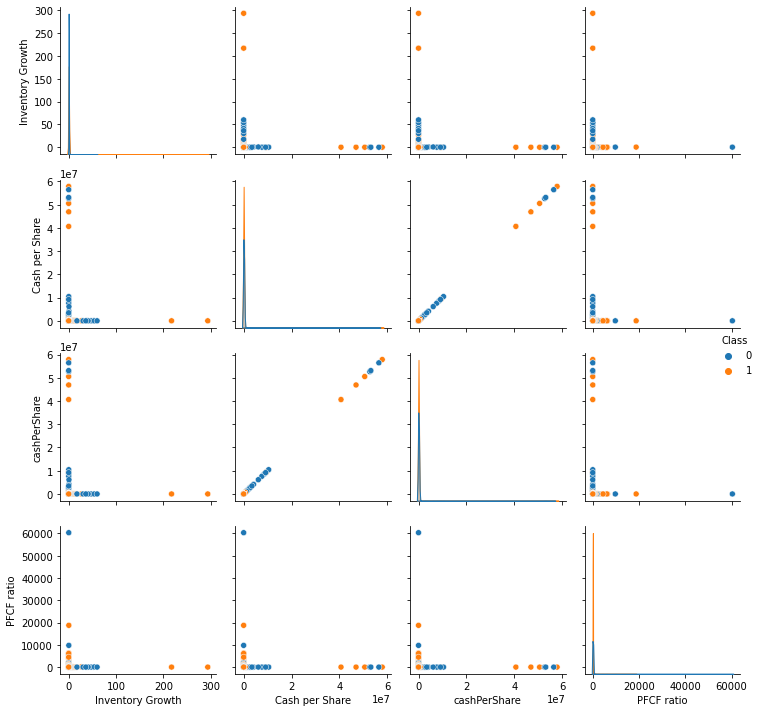

In [110]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis2, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

In [111]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       'Consumer Cyclical', 'Consumer Defensive', 'Energy',
       'Financial Services', 'Healthcare', 'Industrials', 'Real Estate',
       'Technology', 'Utilities', 'Class'],
      dtype='object', length=163)

In [112]:
plotHelper = pd.DataFrame()
col_name = []
mean = []
std = []
for col in df.select_dtypes(include = np.number).columns.to_list():
    col_name.append(col)
    mean.append(df[col].mean())
    std.append(df[col].std())

In [113]:
plotHelper['col_name']=col_name
plotHelper['mean']=mean
plotHelper['std']=std

In [114]:
plotHelper

,col_name,mean,std
0,Revenue,4.775673e+09,1.846329e+10
1,Revenue Growth,4.956746e+00,3.894520e+02
2,Cost of Revenue,3.020098e+09,1.382638e+10
3,Gross Profit,1.754959e+09,6.263635e+09
4,SG&A Expense,7.999096e+08,3.182697e+09
...,...,...,...
157,Industrials,1.562793e-01,3.631341e-01
158,Real Estate,4.678226e-02,2.111804e-01
159,Technology,1.868166e-01,3.897795e-01
160,Utilities,2.920962e-02,1.684002e-01


In [115]:
plotHelper = plotHelper.loc[~(plotHelper.col_name=="Class")]

In [116]:
plotHelper

,col_name,mean,std
0,Revenue,4.775673e+09,1.846329e+10
1,Revenue Growth,4.956746e+00,3.894520e+02
2,Cost of Revenue,3.020098e+09,1.382638e+10
3,Gross Profit,1.754959e+09,6.263635e+09
4,SG&A Expense,7.999096e+08,3.182697e+09
...,...,...,...
156,Healthcare,1.466729e-01,3.537934e-01
157,Industrials,1.562793e-01,3.631341e-01
158,Real Estate,4.678226e-02,2.111804e-01
159,Technology,1.868166e-01,3.897795e-01


In [117]:
plotHelper.sort_values(by="mean", ascending=True)

,col_name,mean,std
122,Net Current Asset Value,-4.689072e+09,2.932941e+10
53,Investing Cash flow,-5.721551e+08,2.755925e+09
50,Capital Expenditure,-3.422684e+08,1.379624e+09
42,Other comprehensive income,-1.895913e+08,1.437622e+09
51,Acquisitions and disposals,-1.351371e+08,1.434109e+09
...,...,...,...
41,Total liabilities,8.081395e+09,5.091418e+10
121,Tangible Asset Value,9.255118e+09,5.482706e+10
123,Invested Capital,9.787245e+09,5.753947e+10
34,Total assets,1.109376e+10,5.708085e+10


In [118]:
top_mean = list(plotHelper.sort_values(by="mean",ascending=False).col_name[0:5])

In [119]:
bottom_mean = list(plotHelper.sort_values(by="mean", ascending=True).col_name[0:5])

In [120]:
top_std = list(plotHelper.sort_values(by="std",ascending=False).col_name[0:5])

In [121]:
bottom_std = list(plotHelper.sort_values(by="std",ascending=True).col_name[0:5])

In [122]:
top_mean

['Market Cap',
 'Total assets',
 'Invested Capital',
 'Tangible Asset Value',
 'Total liabilities']

[]

<Figure size 1440x864 with 0 Axes>

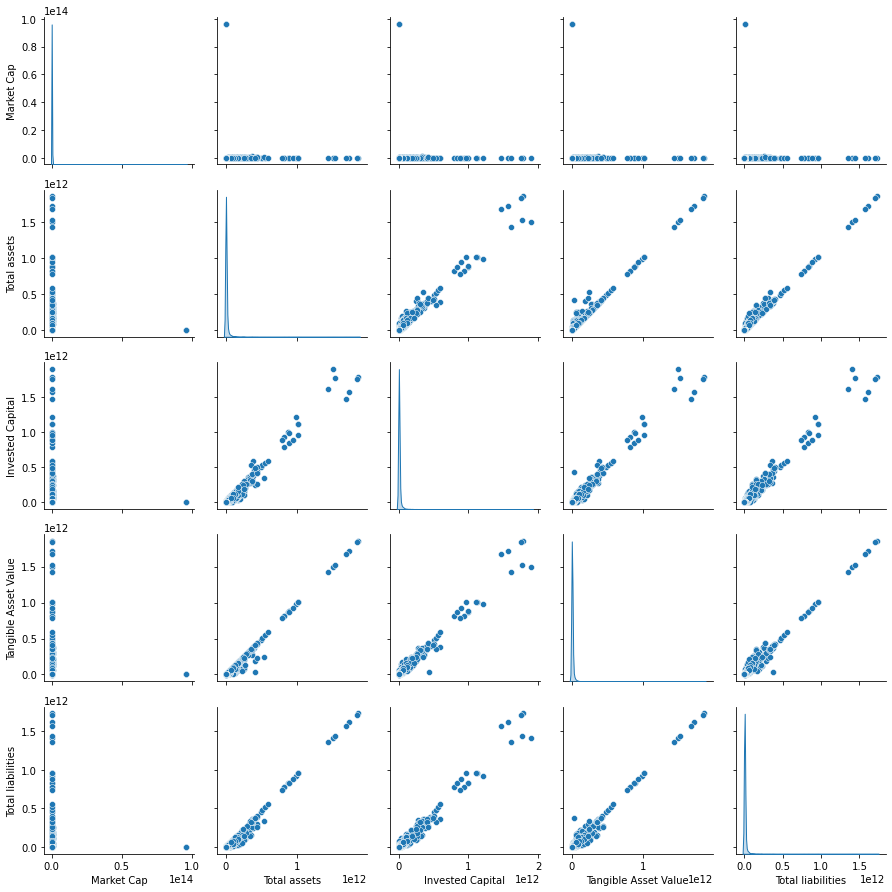

In [123]:
# Plotting cols with highest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[top_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

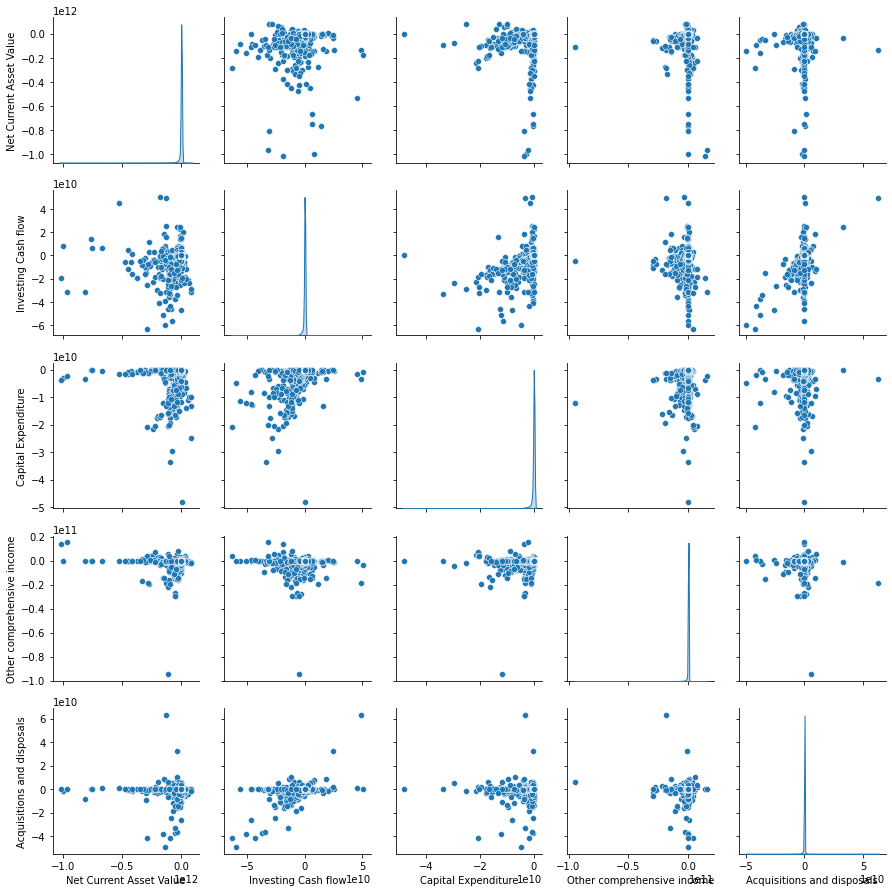

In [124]:
# Plotting with lowest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

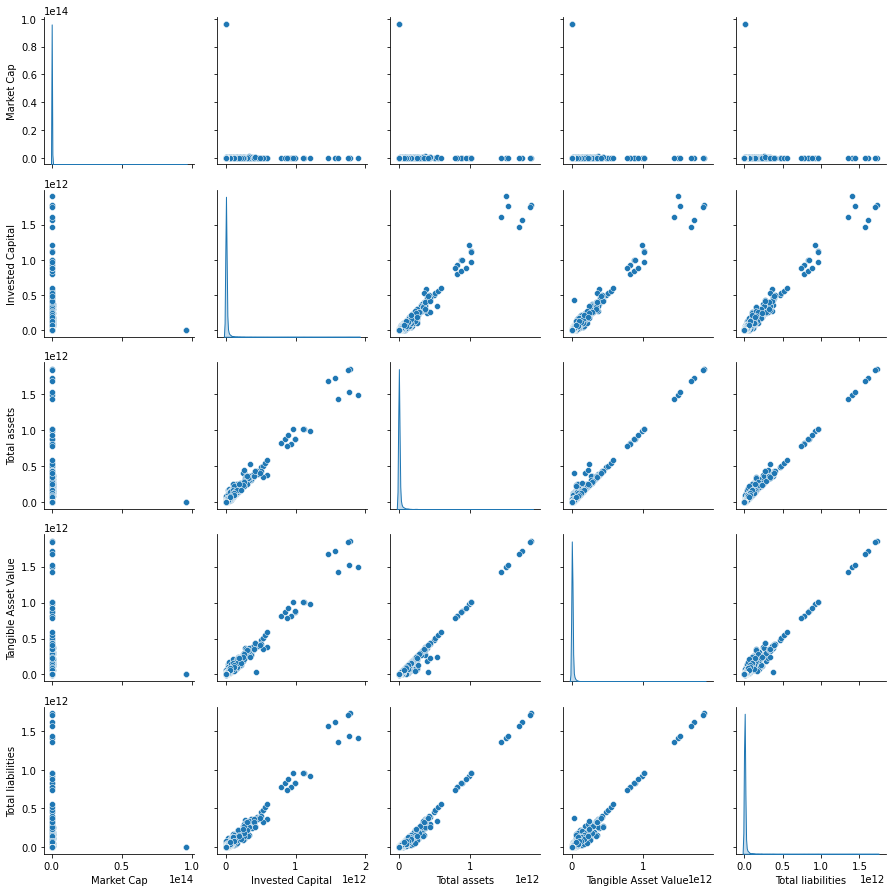

In [125]:
# Plotting cols with highest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[top_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

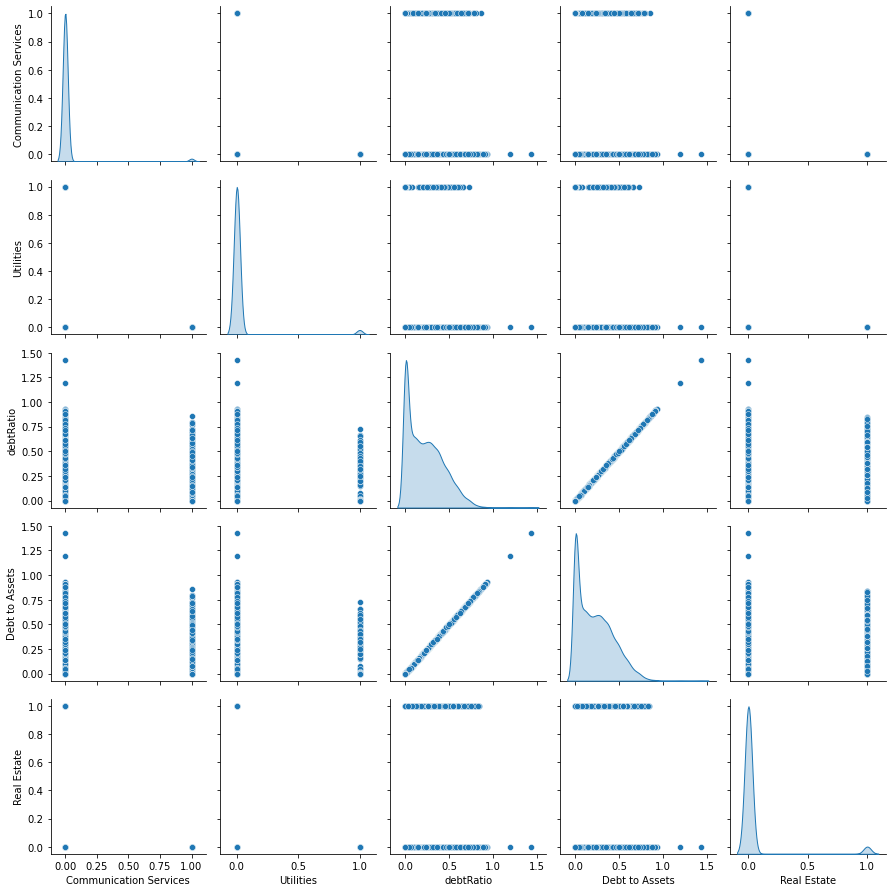

In [126]:
# Plotting cols with lowest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

In [127]:
top_mean

['Market Cap',
 'Total assets',
 'Invested Capital',
 'Tangible Asset Value',
 'Total liabilities']

[]

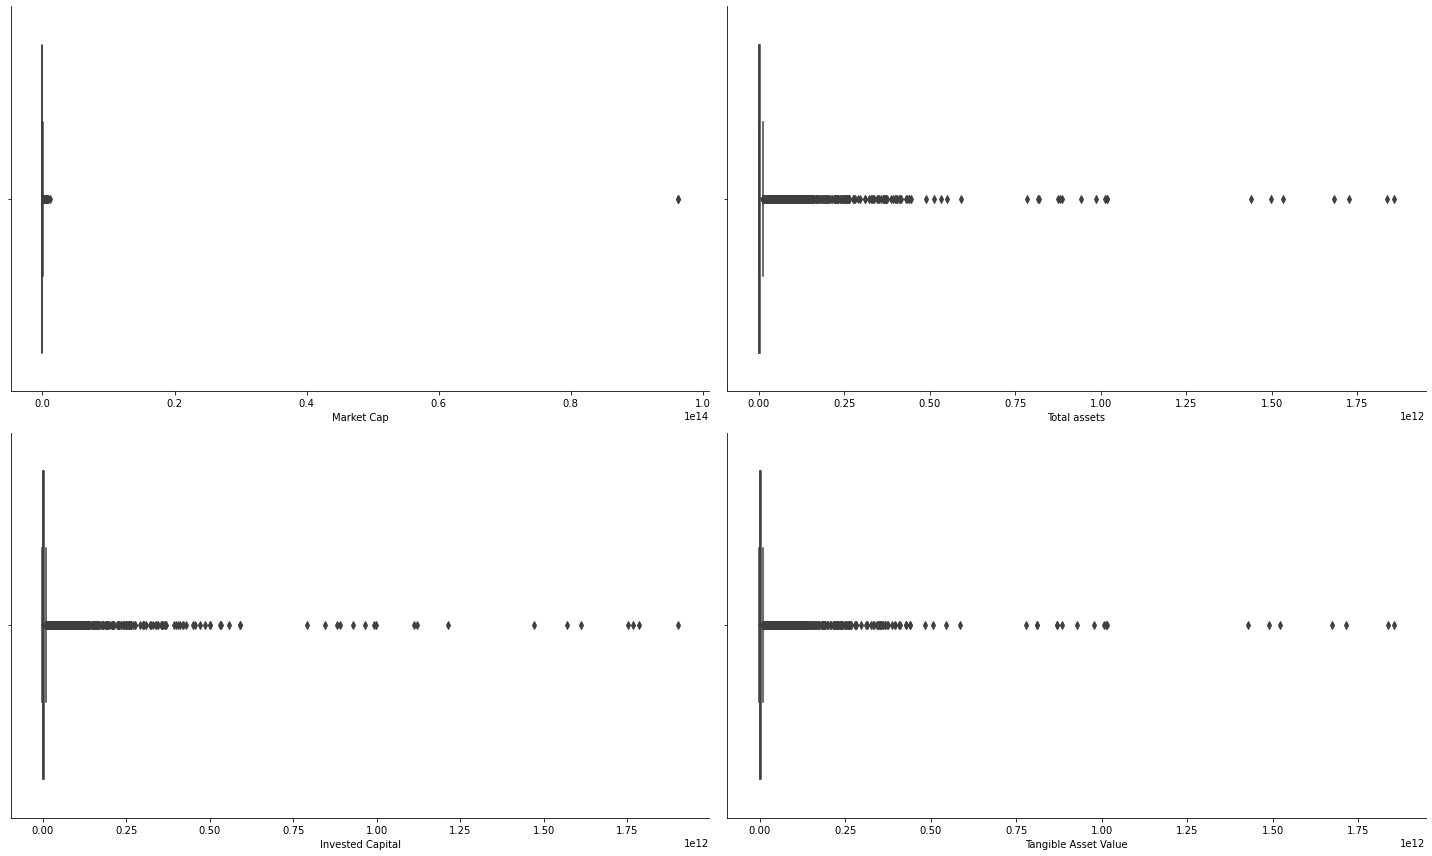

In [128]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_mean[0]], data=df, ax=ax0)
sns.boxplot(df[top_mean[1]], data=df, ax=ax1)
sns.boxplot(df[top_mean[2]], data=df, ax=ax2)
sns.boxplot(df[top_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

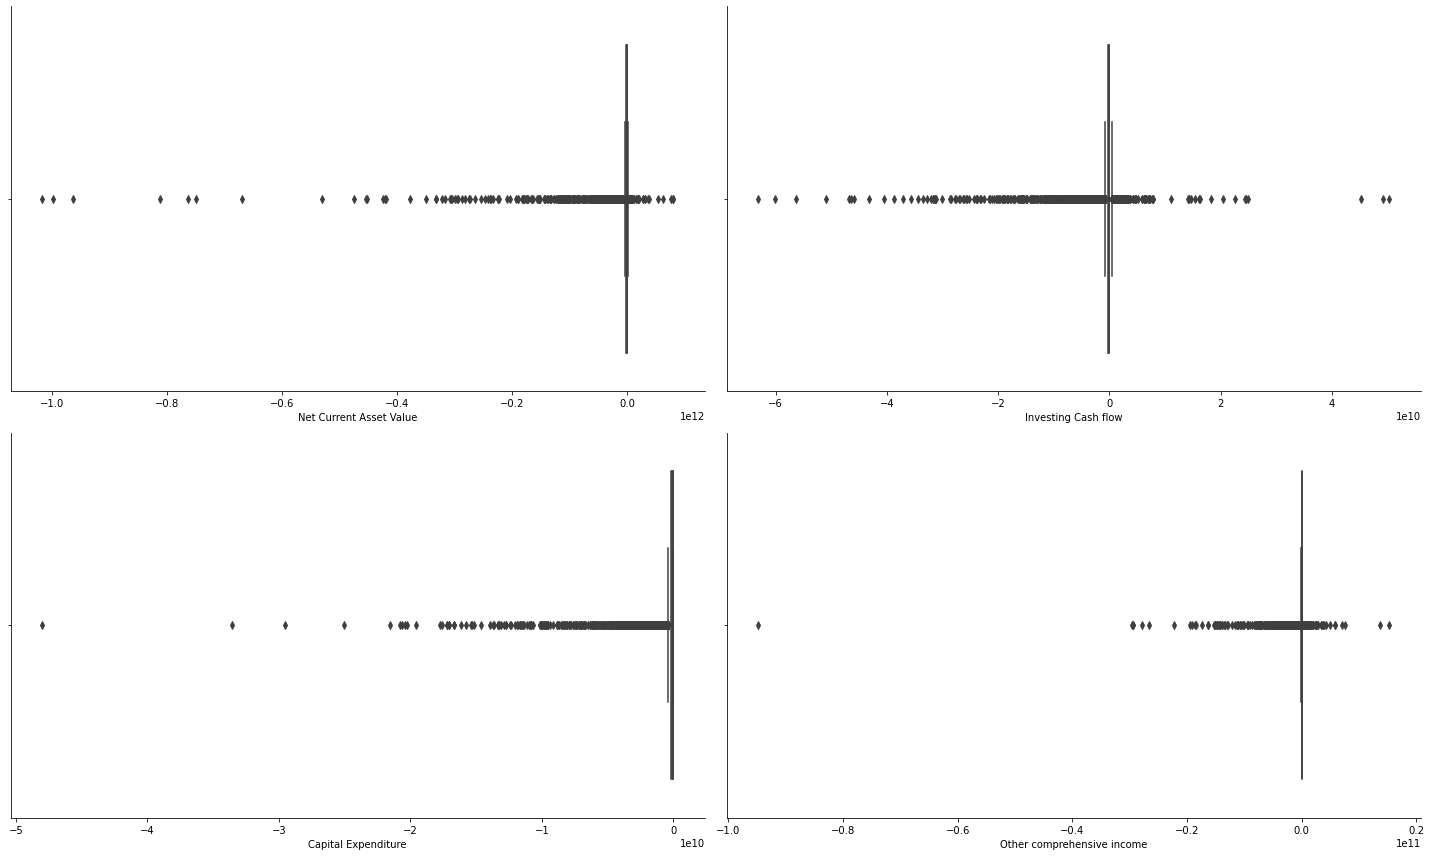

In [129]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_mean[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_mean[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_mean[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

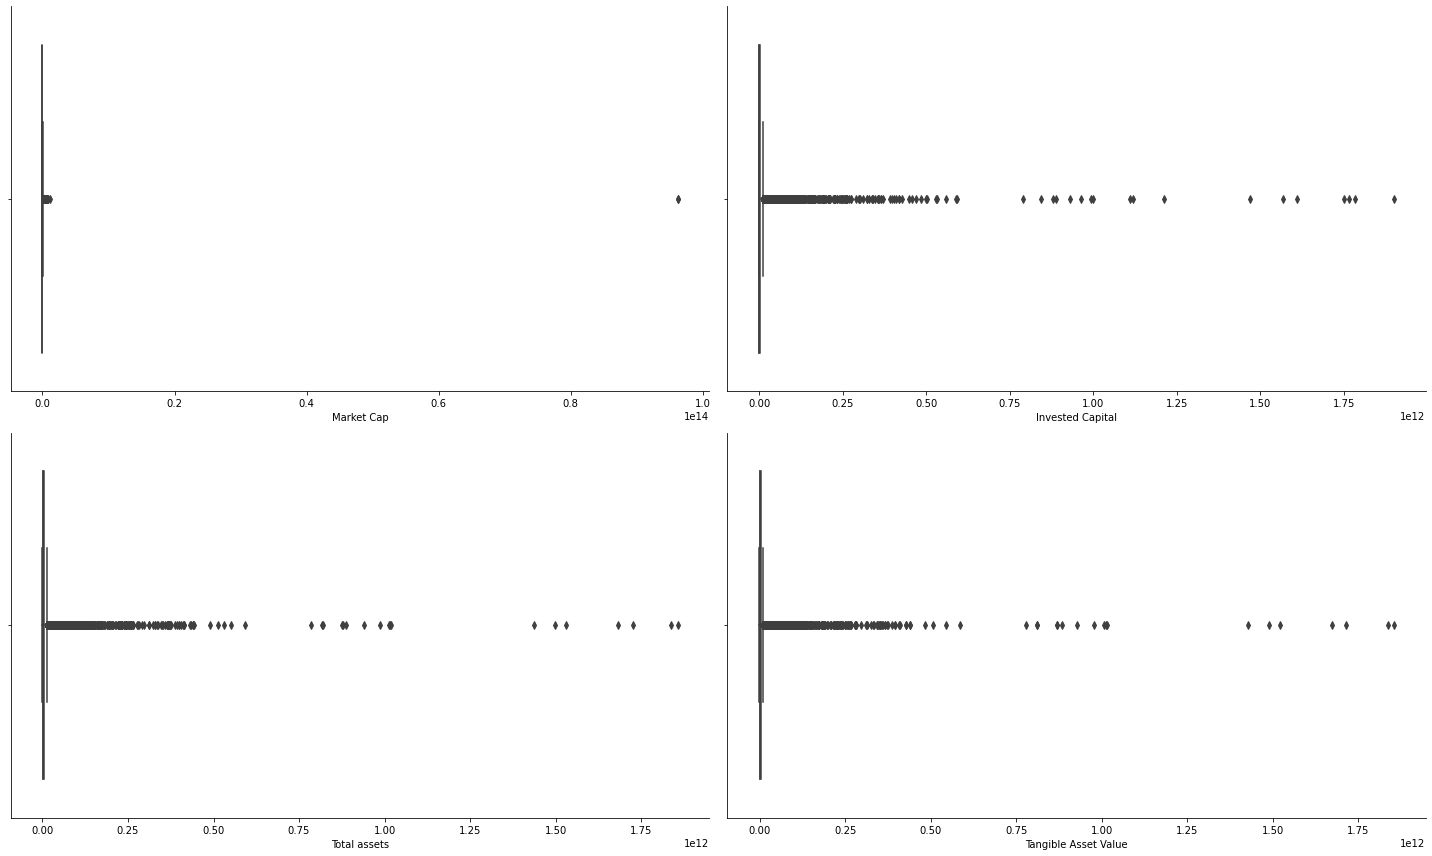

In [130]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_std[0]], data=df, ax=ax0)
sns.boxplot(df[top_std[1]], data=df, ax=ax1)
sns.boxplot(df[top_std[2]], data=df, ax=ax2)
sns.boxplot(df[top_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

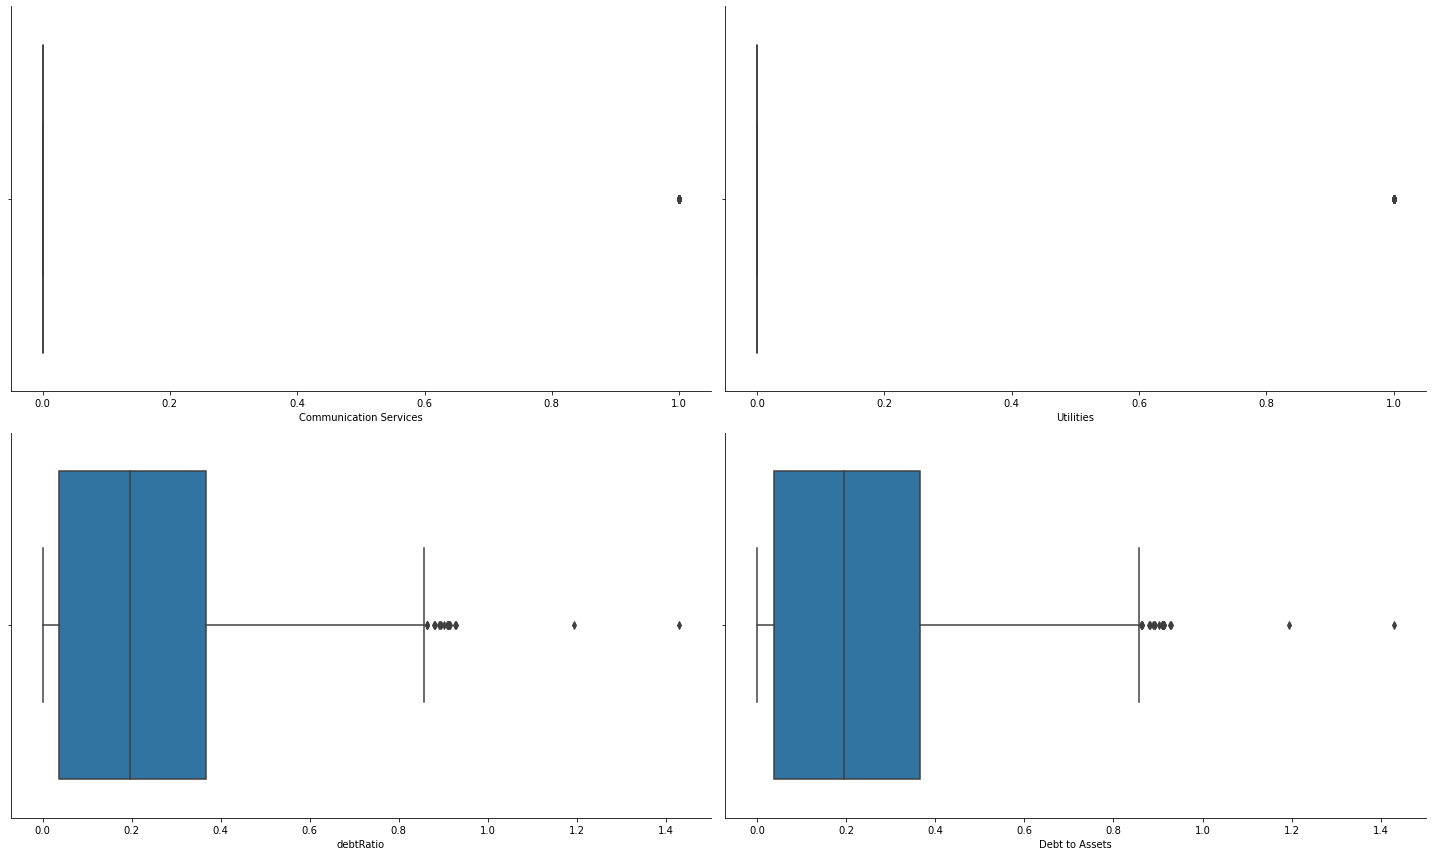

In [131]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_std[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_std[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_std[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [132]:
df.corr()['Class'].sort_values(ascending=False).head(20)

Class                           1.000000
Utilities                       0.070709
Financial Services              0.061592
Gross Profit                    0.055863
Operating Income                0.054420
EBIT                            0.053519
EBITDA                          0.052236
Earnings before Tax             0.051725
Net Income Com                  0.050017
SG&A Expense                    0.049751
Net Income                      0.049267
Operating Expenses              0.048970
Consolidated Income             0.048502
Operating Cash Flow             0.048062
Total shareholders equity       0.047431
Intangibles to Total Assets     0.045774
Revenue                         0.045238
Stock-based compensation        0.044773
longtermDebtToCapitalization    0.044766
Real Estate                     0.041541
Name: Class, dtype: float64

In [133]:
df.corr()['Class'].sort_values(ascending=False).tail(20)

Days Sales Outstanding                -0.024710
daysOfPayablesOutstanding             -0.026134
Days Payables Outstanding             -0.026134
priceSalesRatio                       -0.026388
Net Current Asset Value               -0.026625
SG&A to Revenue                       -0.029502
Stock-based compensation to Revenue   -0.029573
Price to Sales Ratio                  -0.030024
priceToSalesRatio                     -0.030024
Other comprehensive income            -0.030985
Acquisitions and disposals            -0.033400
Capital Expenditure                   -0.035406
Asset Growth                          -0.037197
currentRatio                          -0.038570
SG&A Expenses Growth                  -0.038736
Issuance (buybacks) of shares         -0.039013
cashRatio                             -0.040676
Investing Cash flow                   -0.047338
Healthcare                            -0.064507
Energy                                -0.084223
Name: Class, dtype: float64

In [134]:
list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

['Utilities', 'Financial Services', 'Gross Profit', 'Operating Income']

[]

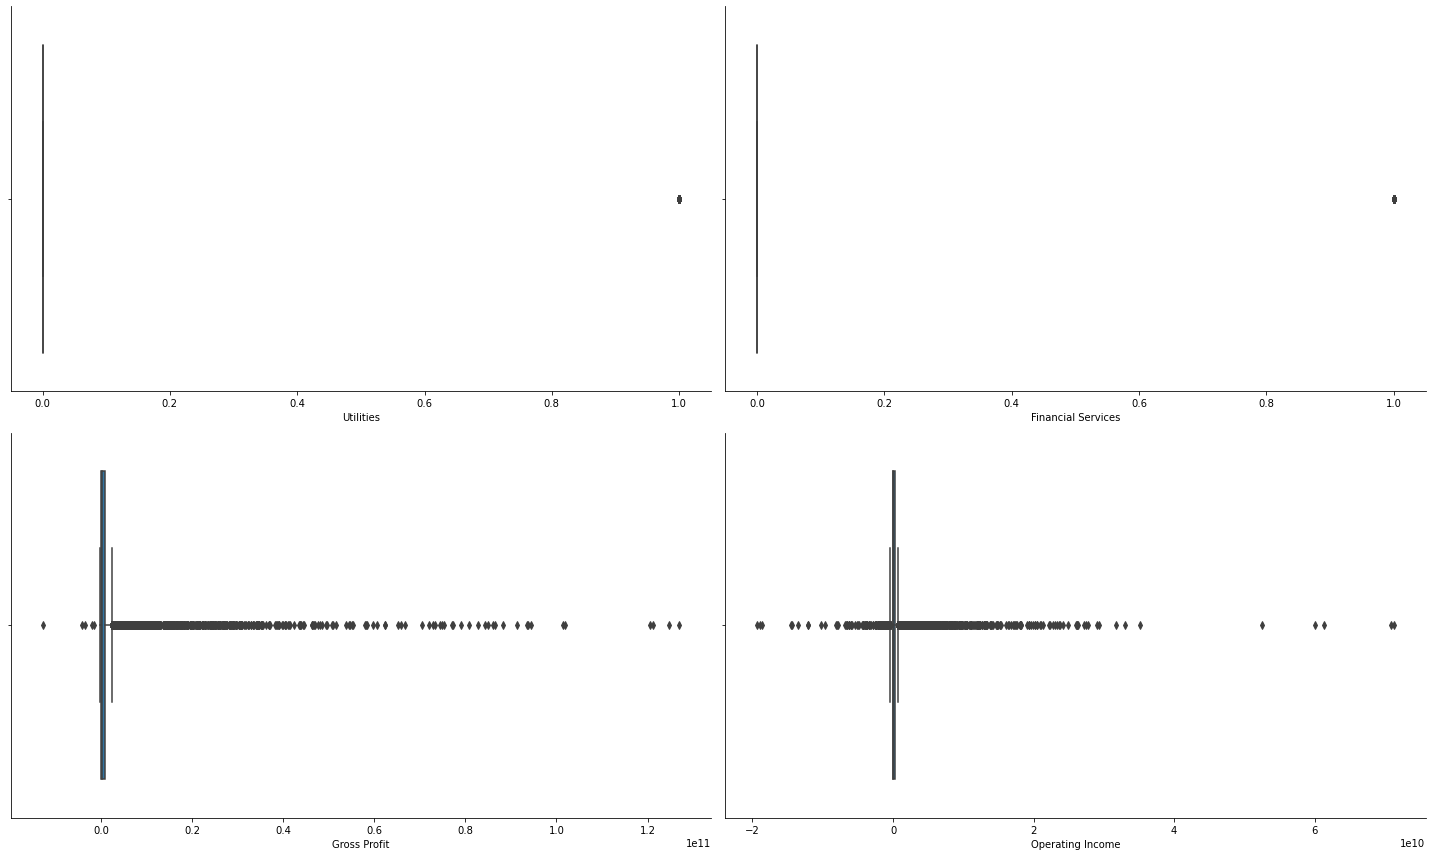

In [135]:
hig_pos_corr = list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_pos_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_pos_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_pos_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_pos_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [136]:
hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:7])

In [137]:
hig_neg_corr

['Energy',
 'Healthcare',
 'Investing Cash flow',
 'cashRatio',
 'Issuance (buybacks) of shares',
 'SG&A Expenses Growth',
 'currentRatio']

In [138]:
hig_neg_corr.remove('Energy')

In [139]:
hig_neg_corr.remove('Healthcare')

[]

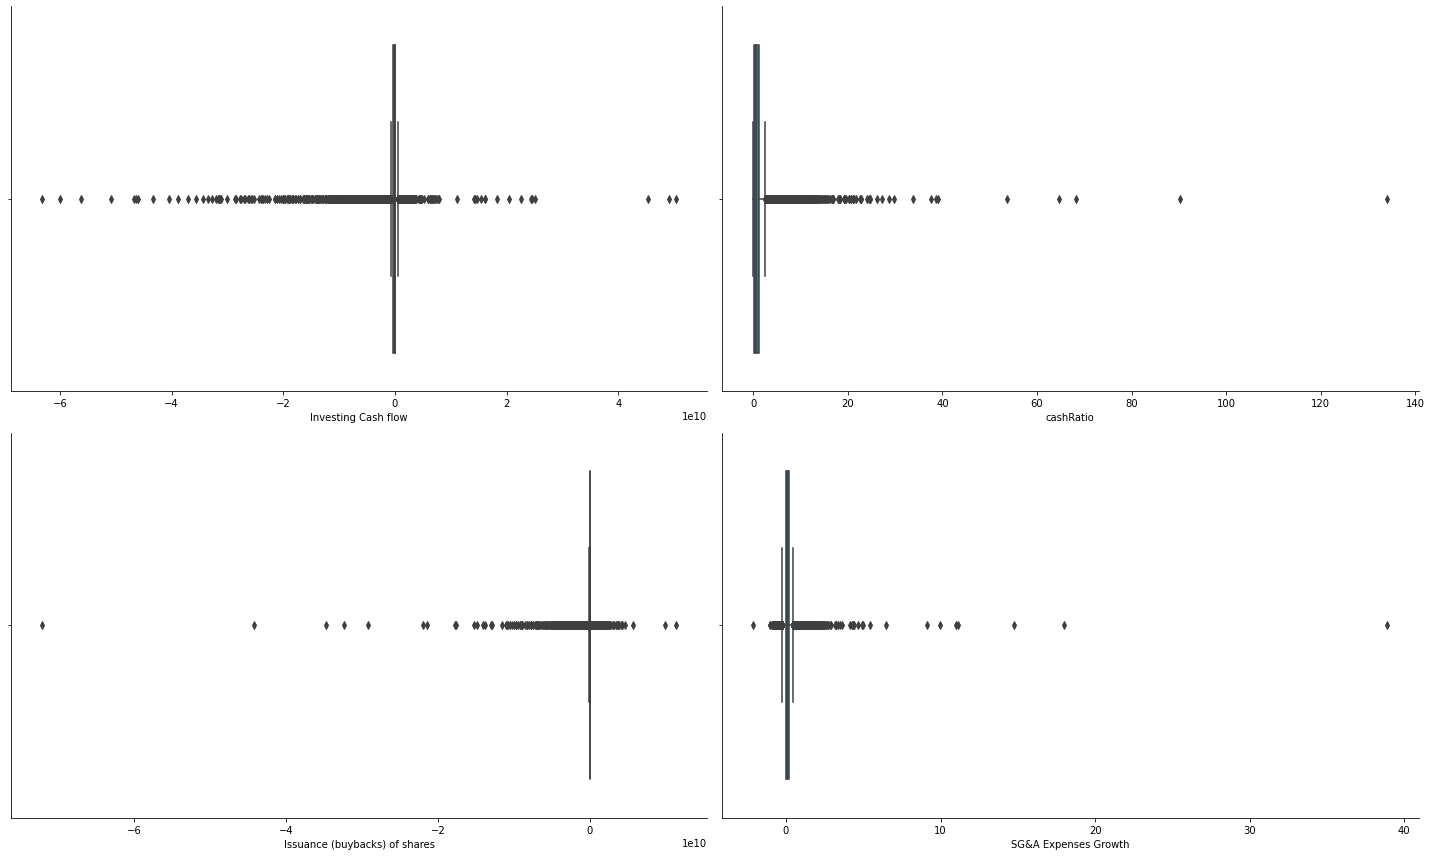

In [140]:
# hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_neg_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_neg_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_neg_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_neg_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

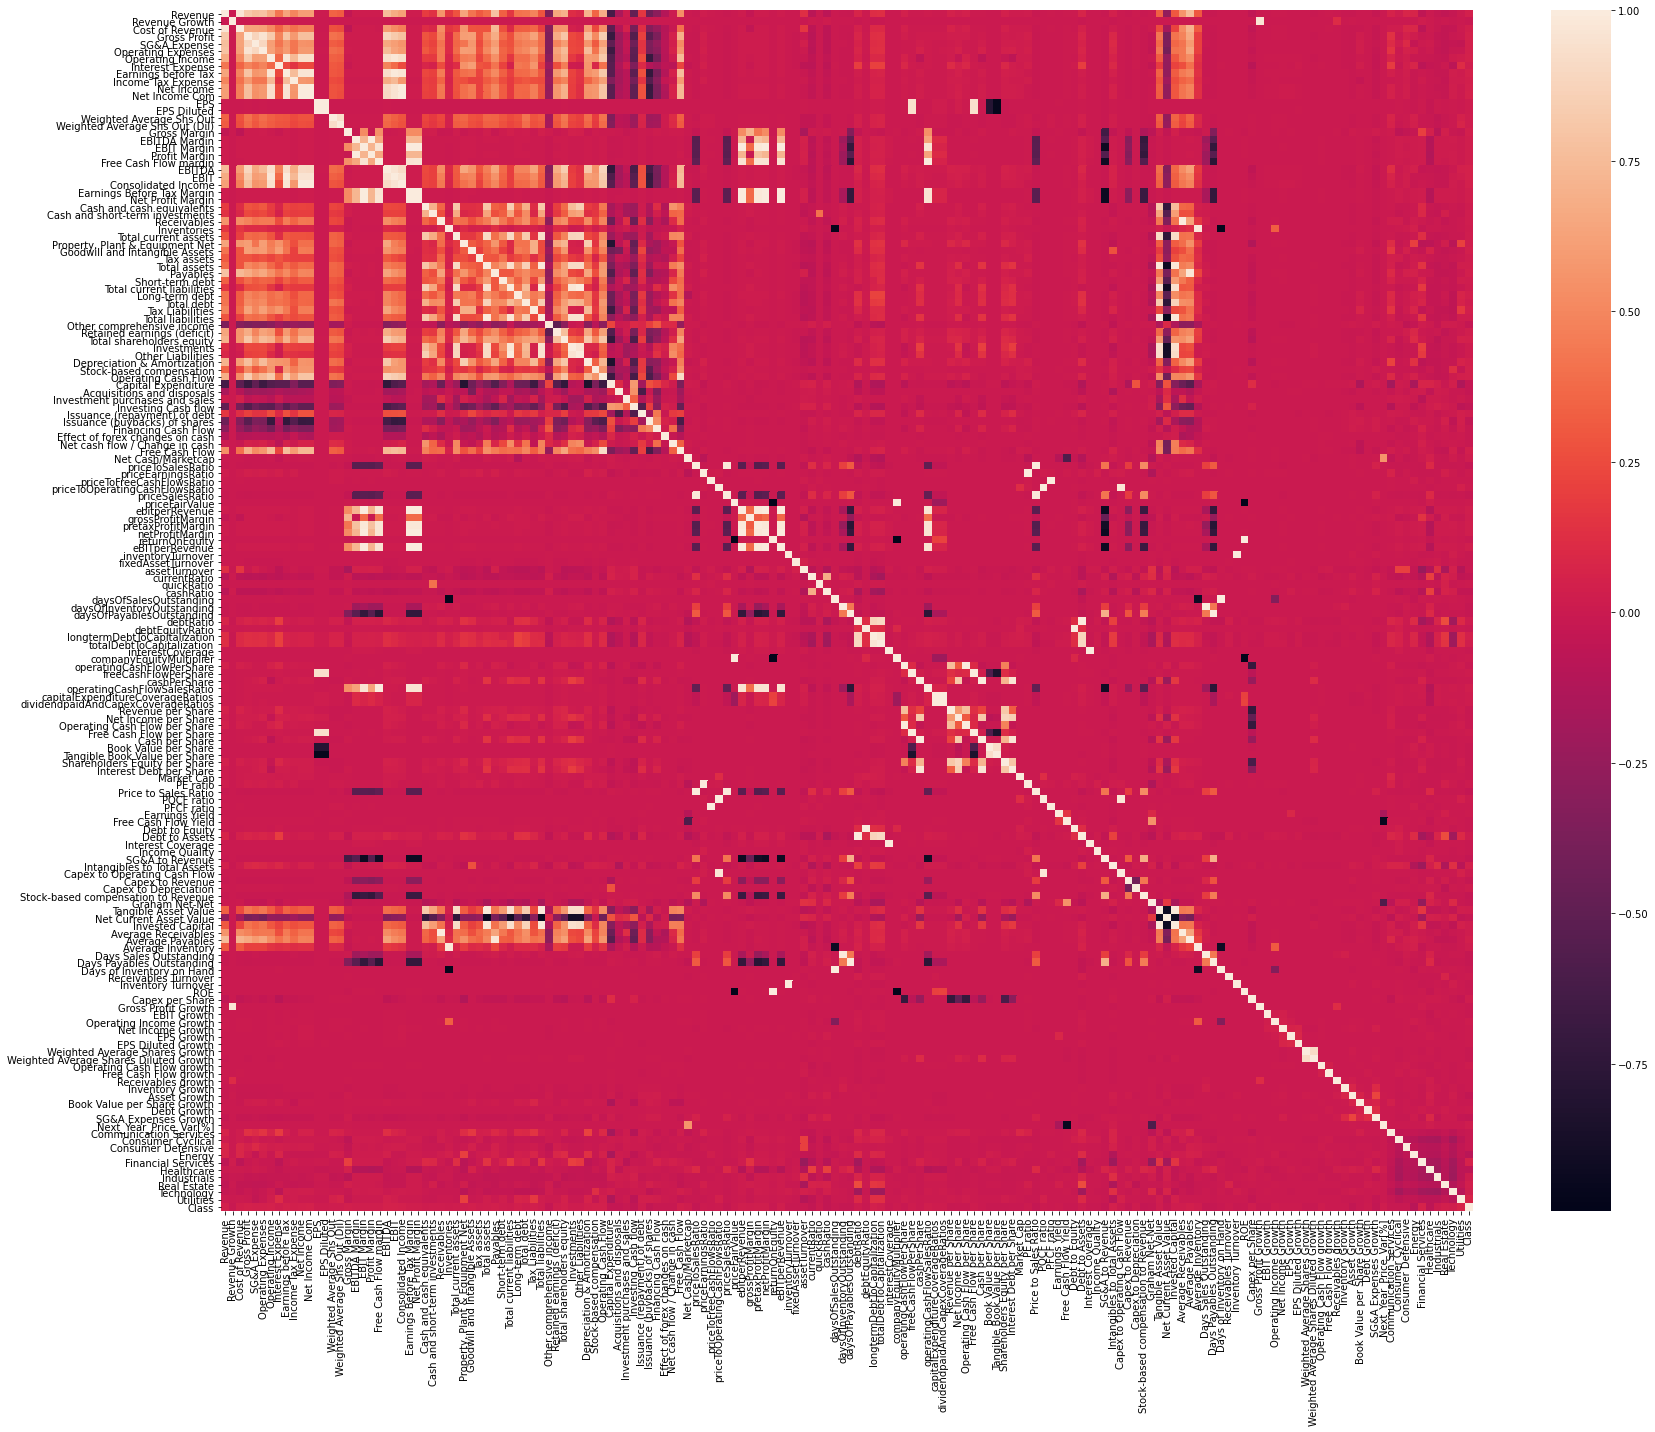

In [141]:
# Plotting the co-relation matrix for the data frame.
plt.figure(figsize = (25, 20))

sns.heatmap(df.corr(),xticklabels=True, yticklabels=True)

# sns.despine()
plt.tight_layout()

plt.show()


In [142]:
sector_list.remove("Basic Materials")

In [143]:
df[sector_list]

,Consumer Defensive,Healthcare,Consumer Cyclical,Industrials,Real Estate,Communication Services,Energy,Financial Services,Utilities,Technology
6,1,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0
18,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4381,0,0,0,0,0,0,0,1,0,0
4382,1,0,0,0,0,0,0,0,0,0
4385,0,0,1,0,0,0,0,0,0,0
4388,0,0,0,0,0,0,0,0,0,0


In [144]:
len(sector_list)

10

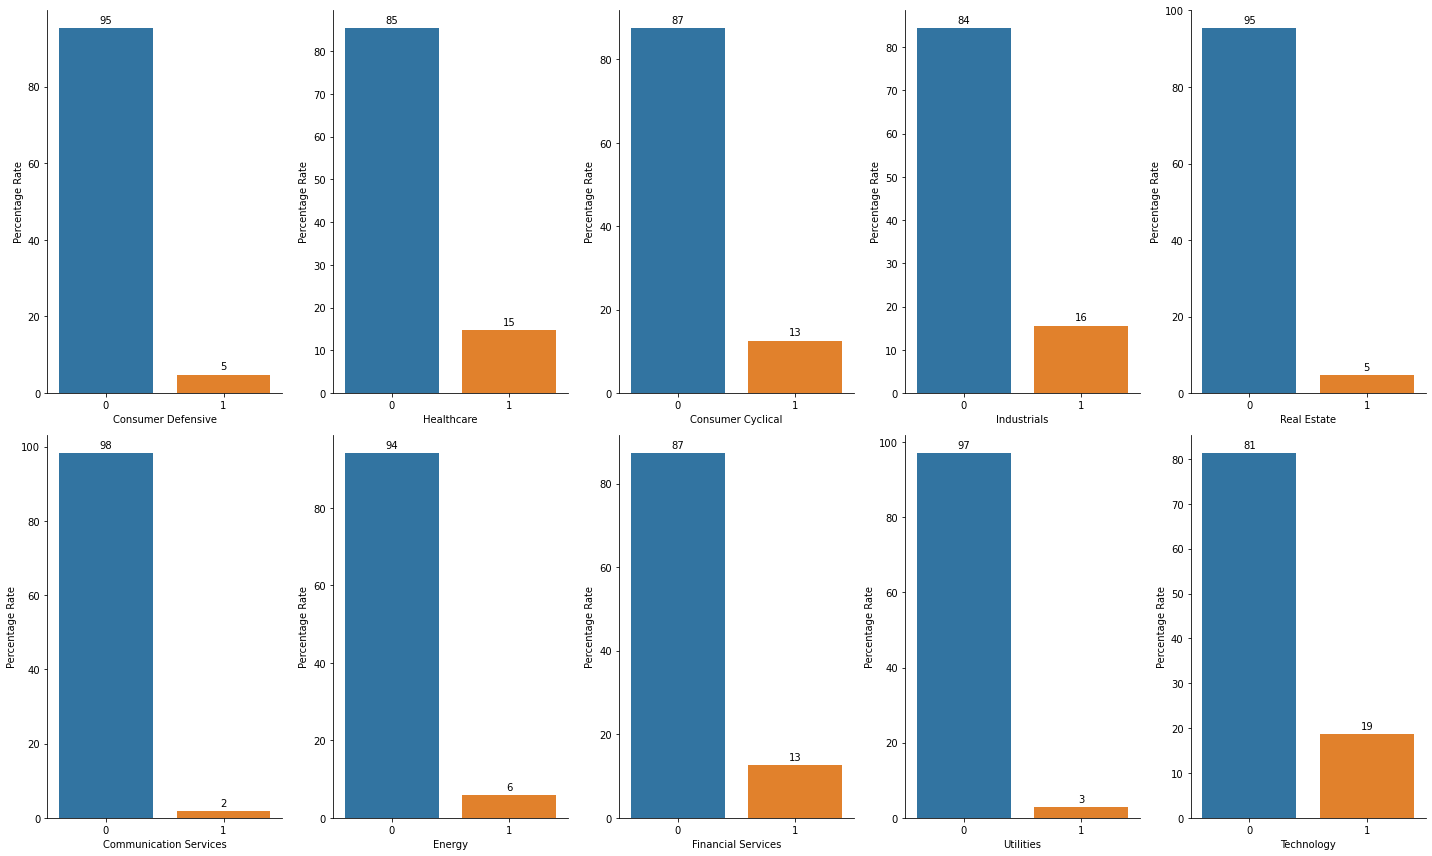

In [145]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
counter = 1

plt.figure(figsize = (20, 12))
for col_list in sector_list:
        
    series = round(((df[col_list].value_counts())/(len(df[col_list])) * 100), 2)

    plt.subplot(2, 5, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list)
    plt.ylabel('Percentage Rate')


    annotate_graph(ax)

    counter += 1


sns.despine()
plt.tight_layout()
plt.show()



# Outlier Treatment

In [146]:
# Droppig Sector Column
df.drop("Sector", axis=1, inplace=True)

In [147]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,2.201000e+09,...,0,1,0,0,0,0,0,0,0,1
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,1.324071e+08,...,0,1,0,0,0,0,0,0,0,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,8.910000e+07,...,0,1,0,0,0,0,0,0,0,1
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,3.740000e+08,...,0,1,0,0,0,0,0,0,0,1
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,3.161260e+08,...,0,1,0,0,0,0,0,0,0,1


## Method 1 Standard Deviation Method

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

In [148]:
# Extracting numerical columns from the telecom_df data frame.
numerical_cols = df.select_dtypes(include = np.number).columns.to_list()

In [149]:
# calculate summary statistics
data = df[numerical_cols]
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = df[((df < lower) | (df > upper)).any(axis=1)]
print('Number of identified outliers: %d' % len(outliers))

Number of identified outliers: 3948


In [150]:
# remove outliers
outliers_removed = df[~((df < lower) | (df > upper)).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 8856


## Method 2 IQR method

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5.

In [151]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Revenue            2.462568e+09
Revenue Growth     1.933500e-01
Cost of Revenue    1.326038e+09
Gross Profit       9.206035e+08
SG&A Expense       3.887538e+08
                       ...     
Industrials        0.000000e+00
Real Estate        0.000000e+00
Technology         0.000000e+00
Utilities          0.000000e+00
Class              1.000000e+00
Length: 162, dtype: float64


In [152]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 12


In [153]:
# We are still losing a lot of data. Therefore, we will use Robust Scalar or MinMax Scalar

## Train Test Split

In [154]:
X = df.drop('Class', axis = 1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8962, 161)
(8962, 1)
(3842, 161)
(3842, 1)


In [155]:
# Robust scaling does not given good result

In [156]:
# Scale the data 

# Robust Scaler uses Scale features using statistics that are robust to outliers
rb = RobustScaler()

X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)


In [ ]:
(y_train==1).sum()[0]

In [158]:
print("Counts of label '1': {}".format((y_train==1).sum()[0]))
print("Counts of label '0': {} \n".format((y_train==0).sum()[0]))

y_train_1 = (y_train==1).sum()[0]
print("Percentage of Profitable Company : {}% \n".format(round(y_train_1/len(y_train)*100,2)))

Counts of label '1': 4983
Counts of label '0': 3979 

Percentage of Profitable Company : 55.6% 



# Principal Component Analysis

In [159]:
df.shape

(12804, 162)

In [160]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [161]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

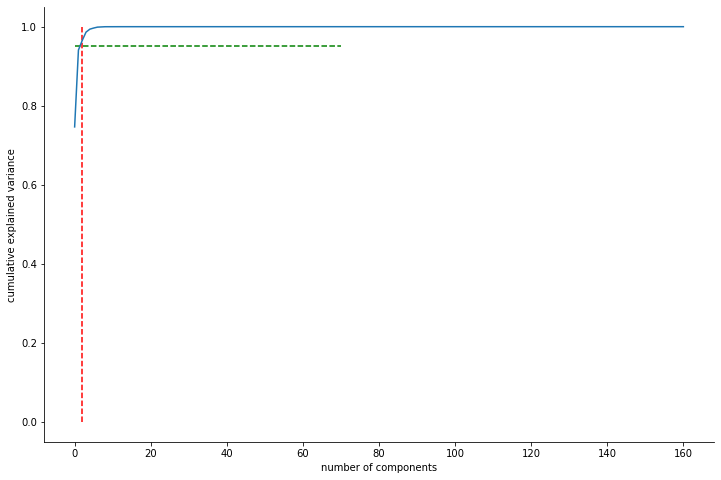

In [189]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = 2,ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [190]:
pca_again = PCA(0.95)

In [191]:
X_train_pca = pca_again.fit_transform(X_train)

In [192]:
X_train_pca.shape

(8962, 3)

In [193]:
# Tranforming X_Test
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(3842, 3)

# MinMax Scaler

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

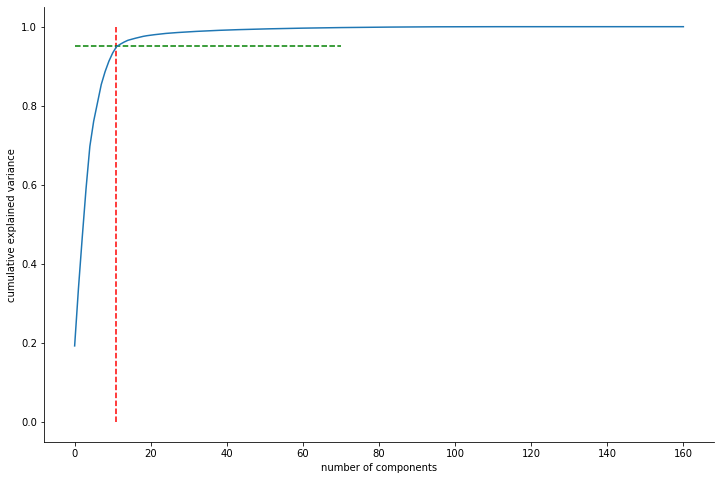

In [201]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = 11,ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [202]:
pca_again = PCA(0.95)

In [203]:
X_train_pca = pca_again.fit_transform(X_train)

In [204]:
X_train_pca.shape

(8962, 13)

In [205]:
# Tranforming X_Test
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(3842, 13)

# Defining functions for Modelling

In [206]:
# Defining the function to plot the ROC Curve

def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)"%auc_score)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating charactersitc example")
    plt.legend(loc="lower right")
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, thresholds

In [207]:
metricsdataframe=pd.DataFrame(columns=['Model',
                                       'Train/Test',
                                       'Roc_auc_score',
                                       'Sensitivity',
                                       'Specificity',
                                      'FPR',
                                      'Positive predictive value',
                                      'Negative Predictive value',
                                      'Precision'])

In [208]:
# Defining function to get the evaluation metrics of the models.
def getModelMetrics(actual_Class=False,pred_Class=False,model_name='',train_or_test=''):

    confusion = metrics.confusion_matrix(actual_Class, pred_Class)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    

    
    Roc_auc_score=round(metrics.roc_auc_score(actual_Class,pred_Class),2)
    # Let's see the sensitivity of our logistic regression model
    Sensitivity=round((TP / float(TP+FN)),2)
    # Let us calculate specificity
    Specificity=round((TN / float(TN+FP)),2)
    # Calculate false postive rate - predicting profit when customer does not have profitted
    FPR=round((FP/ float(TN+FP)),2)
    # positive predictive value 
    PositivePredictiveValue=round((TP / float(TP+FP)),2)
    # Negative predictive value
    NegativePredictiveValue=round((TN / float(TN+ FN)),2)
    # sklearn precision score value 
    Precision=round(metrics.precision_score(actual_Class, pred_Class ),2)
    
    
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_Class,pred_Class)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting profit when customer does not have profitted
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_Class, pred_Class )))
    
    data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,FPR,PositivePredictiveValue,NegativePredictiveValue,Precision]
    
    series_metrics=pd.Series(data_list,index=metricsdataframe.columns)
    
    return series_metrics
    

In [209]:
# Defining function to write the evaluation metrics of the models into data frame.
def WriteModelMetrics(series_metrics,metricsdataframe):
    metricsdataframe = metricsdataframe.append(series_metrics,ignore_index=True)
    return metricsdataframe

In [210]:
# Function to find the optimal cutoff for classifing as Profit/non-profit
def findOptimalCutoff(df):
    
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.Class_Prob.map( lambda x: 1 if x > i else 0)
        
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for i in num:
        cm1 = metrics.confusion_matrix(df.Class, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    sns.despine()
    plt.show()

In [211]:
# Calculating VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Defining a function to give VIF value 
def vif_cal(X):     
    vif = pd.DataFrame() 
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [212]:
# This method will result in the calculation of predicted value of the Class column.
def predictClassWithProb(model,X,y,prob,model_name='',train_or_test=''):
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'Class':y.Class, 'Class_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Class_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.Class_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    series_metrics=getModelMetrics(y_df.Class,y_df.final_predicted,model_name,train_or_test)
    return y_df,series_metrics

In [213]:
# This method will perform cross-validation and the display the model report.
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [214]:
# This method will plot accuracy of the model with the max_depth of decision tree.
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [215]:
# This method will plot accuracy of the random forest model.
def random_forst_feature_graph(grid_search, param):
    scores = grid_search.cv_results_
    plt.figure(figsize=(8,8))
    
    param = "param_"+param
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training accuracy")

    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test accuracy")

    plt.xlabel(param)
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    sns.despine()
    plt.show()

# 1. Logistic Regression

In [216]:
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

In [217]:
X_train_pca.shape

(8962, 13)

In [218]:
y_train.shape

(8962, 1)

In [219]:
# Creating Train-Test variables for Logistic Regression
X_train_lr = pd.DataFrame(X_train_pca)
y_train_lr = pd.DataFrame(y_train.values.reshape(-1,1))
X_test_lr = pd.DataFrame(X_test_pca)
y_test_lr = y_test

In [220]:
y_train_lr.rename(columns={0:"Class"}, inplace=True)

In [221]:
y_train_lr

,Class
0,1
1,0
2,1
3,1
4,0
...,...
8957,1
8958,0
8959,1
8960,0


In [222]:
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 8962
Model:                            GLM   Df Residuals:                     8948
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6015.6
Date:                Sun, 10 Oct 2021   Deviance:                       12031.
Time:                        03:14:02   Pearson chi2:                 8.98e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2334      0.022     10.785      0.000       0.191       0.276
0              0.0747      0.046      1.621      0.105      -0.016       0.165
1              0.2332      0.053      4.384      0.000       0.129       0.337
2             -0.0427      0.056     -0.763      0.445      -0.152       0.067
3             -0.3994      0.058     -6.844      0.000      -0.514      -0.285
4             -0.2728      0.062     -4.425      0.000      -0.394      -0.152
5             -0.5760      0.081     -7.071      0.000      -0.736      -0.416
6              0.3807      0.093      4.081      0.000       0.198       0.564
7             -0.3082      0.096     -3.221      0.001      -0.496      -0.121
8              0.0400      0.118      0.339      0.735      -0.191       0.271
9              1.0354      0.134      7.711      0.000       0.772       1.299
10             0.4251      0.161      2.632      0.008       0.109       0.742
11            -1.0074      0.165     -6.123      0.000      -1.330      -0.685
12            -0.5740      0.279     -2.061      0.039      -1.120      -0.028
==============================================================================
"""

In [223]:
# Checking for the VIF of the train data.
vif = vif_cal(X_train_lr) 
vif


,Features,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,1.0


### Observation
- VIF value of all the columns are 1 which is good number, so we will consider the p-value for dropping the variables.
- p-value of col "8" = 0.735

Need to drop them one by one. Let's start by dropping column "8"

In [224]:
# Dropping column 5 and building the model.
X_train_lr.drop(8, axis=1, inplace=True)

In [225]:
# Fitting the model after dropping column 4.
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 8962
Model:                            GLM   Df Residuals:                     8949
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6015.6
Date:                Sun, 10 Oct 2021   Deviance:                       12031.
Time:                        03:14:42   Pearson chi2:                 8.98e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2334      0.022     10.788      0.000       0.191       0.276
0              0.0749      0.046      1.625      0.104      -0.015       0.165
1              0.2332      0.053      4.385      0.000       0.129       0.337
2             -0.0429      0.056     -0.767      0.443      -0.153       0.067
3             -0.3994      0.058     -6.845      0.000      -0.514      -0.285
4             -0.2729      0.062     -4.428      0.000      -0.394      -0.152
5             -0.5756      0.081     -7.066      0.000      -0.735      -0.416
6              0.3807      0.093      4.082      0.000       0.198       0.564
7             -0.3082      0.096     -3.224      0.001      -0.496      -0.121
9              1.0400      0.134      7.754      0.000       0.777       1.303
10             0.4248      0.162      2.628      0.009       0.108       0.742
11            -1.0090      0.165     -6.133      0.000      -1.331      -0.687
12            -0.5739      0.279     -2.058      0.040      -1.120      -0.027
==============================================================================
"""

In [226]:
# Checking with VIF again.
vif = vif_cal(X_train_lr) 
vif

,Features,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,9,1.0
9,10,1.0


### Observation
- p-value of col "2" = 0.443

Need to drop col 2. 

In [227]:
# Dropping column 4 and building the model.
X_train_lr.drop(2, axis=1, inplace=True)

In [228]:
# Fitting the model after dropping column 4.
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 8962
Model:                            GLM   Df Residuals:                     8950
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6015.9
Date:                Sun, 10 Oct 2021   Deviance:                       12032.
Time:                        03:15:06   Pearson chi2:                 8.98e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2332      0.022     10.781      0.000       0.191       0.276
0              0.0748      0.046      1.622      0.105      -0.016       0.165
1              0.2331      0.053      4.386      0.000       0.129       0.337
3             -0.3990      0.058     -6.843      0.000      -0.513      -0.285
4             -0.2724      0.062     -4.421      0.000      -0.393      -0.152
5             -0.5758      0.081     -7.070      0.000      -0.735      -0.416
6              0.3806      0.093      4.081      0.000       0.198       0.563
7             -0.3079      0.096     -3.223      0.001      -0.495      -0.121
9              1.0382      0.134      7.751      0.000       0.776       1.301
10             0.4229      0.161      2.624      0.009       0.107       0.739
11            -1.0074      0.164     -6.126      0.000      -1.330      -0.685
12            -0.5731      0.278     -2.061      0.039      -1.118      -0.028
==============================================================================
"""

In [229]:
# Checking with VIF again.
vif = vif_cal(X_train_lr) 
vif

,Features,VIF
0,0,1.0
1,1,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,9,1.0
8,10,1.0
9,11,1.0


In [230]:
# Dropping col 0
X_train_lr.drop(0, axis=1, inplace=True)

In [231]:
# Fitting the model after dropping column 4.
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 8962
Model:                            GLM   Df Residuals:                     8951
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6017.2
Date:                Sun, 10 Oct 2021   Deviance:                       12034.
Time:                        03:15:28   Pearson chi2:                 8.98e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2330      0.022     10.771      0.000       0.191       0.275
1              0.2331      0.053      4.380      0.000       0.129       0.337
3             -0.3994      0.058     -6.847      0.000      -0.514      -0.285
4             -0.2717      0.062     -4.413      0.000      -0.392      -0.151
5             -0.5771      0.081     -7.087      0.000      -0.737      -0.417
6              0.3801      0.093      4.076      0.000       0.197       0.563
7             -0.3069      0.095     -3.220      0.001      -0.494      -0.120
9              1.0330      0.133      7.744      0.000       0.772       1.294
10             0.4223      0.161      2.627      0.009       0.107       0.737
11            -1.0049      0.164     -6.113      0.000      -1.327      -0.683
12            -0.5740      0.277     -2.073      0.038      -1.117      -0.031
==============================================================================
"""

In [232]:
# Checking with VIF again.
vif = vif_cal(X_train_lr) 
vif

,Features,VIF
0,1,1.0
1,3,1.0
2,4,1.0
3,5,1.0
4,6,1.0
5,7,1.0
6,9,1.0
7,10,1.0
8,11,1.0
9,12,1.0


In [233]:
# Conclusion, since P>0.05, the coefficient of none of the columns is statistically significant.

In [234]:
# Creating Train-Test variables for Logistic Regression
X_train_lr = pd.DataFrame(X_train_pca)
y_train_lr = pd.DataFrame(y_train.values.reshape(-1,1))
X_test_lr = pd.DataFrame(X_test_pca)
y_test_lr = y_test

In [235]:
lg = LogisticRegression()

In [236]:
modelfit(lg, X_train_lr, y_train_lr)


Model Report
Accuracy : 0.554
Recall/Sensitivity : 0.8021
AUC Score (Train): 0.602179
CV Score : Mean - 0.5978181 | Std - 0.01406062 | Min - 0.5745003 | Max - 0.6163095


In [237]:
# predictions on Test data
pred_probs_test = lg.predict(X_test_lr)
getModelMetrics(y_test_lr,pred_probs_test)

Roc_auc_score : 0.5569306855511533
Sensitivity/Recall : 0.7998167659184608
Specificity: 0.3140446051838457
False Positive Rate: 0.6859553948161543
Positive predictive value: 0.6054091539528432
Negative Predictive value: 0.5438413361169102
sklearn precision score value: 0.6054091539528432


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                   0.8
Specificity                  0.31
FPR                          0.69
Positive predictive value    0.61
Negative Predictive value    0.54
Precision                    0.61
dtype: object

In [238]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test_lr,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test_lr,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test_lr,pred_probs_test)))

Accuracy : 0.5900572618427902
Recall : 0.7998167659184608
Precision : 0.6054091539528432


In [239]:
#Making prediction on the test data
pred_probs_train = lg.predict_proba(X_train_lr)[:,1]

print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_lr, pred_probs_train)))

roc_auc_score(Train) 0.6


In [240]:
X_train_lr.shape

(8962, 13)

In [241]:
y_train_lr.shape

(8962, 1)

In [242]:
y_train_lr.rename(columns={0:"Class"}, inplace=True)

cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_train_lr,y_train_lr,cut_off_prob)


Roc_auc_score : 0.5539914876198578
Sensitivity/Recall : 0.8021272325908088
Specificity: 0.30585574264890675
False Positive Rate: 0.6941442573510932
Positive predictive value: 0.5913596685900281
Negative Predictive value: 0.5524285065819338
sklearn precision score value: 0.5913596685900281


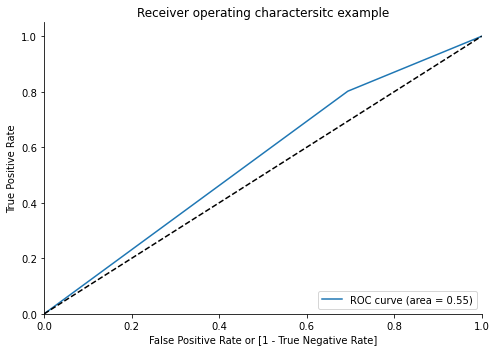

roc_auc_score : 0.55


In [243]:
draw_roc(y_train_df.Class, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

In [244]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

roc_auc_score : 0.55


     prob  accuracy     sensi     speci
0.0   0.0  0.556014  1.000000  0.000000
0.1   0.1  0.556014  1.000000  0.000000
0.2   0.2  0.556014  1.000000  0.000000
0.3   0.3  0.556014  1.000000  0.000000
0.4   0.4  0.568288  0.969296  0.066097
0.5   0.5  0.581790  0.802127  0.305856
0.6   0.6  0.542401  0.364238  0.765519
0.7   0.7  0.466748  0.064620  0.970344
0.8   0.8  0.444990  0.004014  0.997235
0.9   0.9  0.443874  0.000000  0.999749


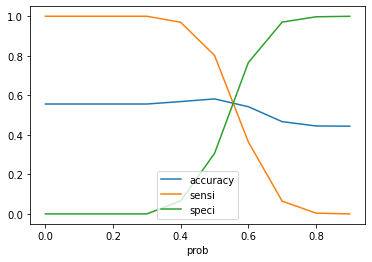

<Figure size 504x360 with 0 Axes>

In [245]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

## 2. Decision Tree

In [246]:
# Creating Train-Test variables for Decision Tree
X_train_dt = pd.DataFrame(X_train_pca)
y_train_dt = pd.DataFrame(y_train)
X_test_dt = pd.DataFrame(X_test_pca)
y_test_dt = y_test

In [247]:
##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=10,
                             random_state=10)
modelfit(dt, X_train_dt, y_train_dt)


Model Report
Accuracy : 0.6202
Recall/Sensitivity : 0.6107
AUC Score (Train): 0.663831
CV Score : Mean - 0.5993552 | Std - 0.009944711 | Min - 0.5800936 | Max - 0.6066289


In [248]:
# make predictions
pred_probs_test = dt.predict(X_test_dt)

#Let's check the model metrices.

getModelMetrics(y_test_dt,pred_probs_test)

Roc_auc_score : 0.5637239593472162
Sensitivity/Recall : 0.5487860742098031
Specificity: 0.5786618444846293
False Positive Rate: 0.4213381555153707
Positive predictive value: 0.6315234580917237
Negative Predictive value: 0.493573264781491
sklearn precision score value: 0.6315234580917237


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                  0.55
Specificity                  0.58
FPR                          0.42
Positive predictive value    0.63
Negative Predictive value    0.49
Precision                    0.63
dtype: object

In [275]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,5,10,15,20,25,30,300,100],
    'min_samples_leaf': range(100, 5000, 150),
    'min_samples_split': range(100, 5000, 150),
    'max_features': [5,8,10,15,20,100,150]
}
# Create a base model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10, n_jobs = -1,verbose = 1000,scoring="accuracy")

In [276]:
# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

Fitting 10 folds for each of 76230 candidates, totalling 762300 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25, 30, 300, 100],
                         'max_features': [5, 8, 10, 15, 20, 100, 150],
                         'min_samples_leaf': range(100, 5000, 150),
                         'min_samples_split': range(100, 5000, 150)},
             scoring='accuracy', verbose=1)

In [279]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.5769905140149705 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 400}


In [280]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011261,0.000353,0.001159,0.000043,2,5,100,100,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.542921,...,0.517857,0.529018,0.514509,0.518973,0.522321,0.564732,0.516741,0.528005,0.014565,27673
1,0.011178,0.000429,0.001321,0.000587,2,5,100,250,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.542921,...,0.517857,0.529018,0.514509,0.518973,0.522321,0.564732,0.516741,0.528005,0.014565,27673
2,0.012652,0.002801,0.001090,0.000027,2,5,100,400,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.542921,...,0.517857,0.529018,0.514509,0.518973,0.522321,0.564732,0.516741,0.528005,0.014565,27673
3,0.011502,0.001176,0.001095,0.000030,2,5,100,550,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.542921,...,0.517857,0.529018,0.514509,0.518973,0.522321,0.564732,0.516741,0.528005,0.014565,27673
4,0.015231,0.003343,0.001995,0.001141,2,5,100,700,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.542921,...,0.517857,0.529018,0.514509,0.518973,0.522321,0.564732,0.516741,0.528005,0.014565,27673


In [281]:
cv_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23960,0.053400,0.002919,0.001840,0.000806,10,8,100,400,"{'max_depth': 10, 'max_features': 8, 'min_samp...",0.590858,...,0.580357,0.568080,0.591518,0.564732,0.566964,0.617188,0.578125,0.576991,0.019735,1
31583,0.055329,0.004194,0.001934,0.000868,15,8,100,400,"{'max_depth': 15, 'max_features': 8, 'min_samp...",0.585284,...,0.600446,0.572545,0.580357,0.570312,0.572545,0.608259,0.589286,0.576325,0.020754,2
39206,0.081059,0.029690,0.002554,0.002997,20,8,100,400,"{'max_depth': 20, 'max_features': 8, 'min_samp...",0.585284,...,0.600446,0.572545,0.580357,0.570312,0.572545,0.608259,0.589286,0.576325,0.020754,2
46829,0.053900,0.006648,0.001825,0.001028,25,8,100,400,"{'max_depth': 25, 'max_features': 8, 'min_samp...",0.585284,...,0.600446,0.572545,0.580357,0.570312,0.572545,0.608259,0.589286,0.576325,0.020754,2
54452,0.057755,0.008311,0.002106,0.001578,30,8,100,400,"{'max_depth': 30, 'max_features': 8, 'min_samp...",0.585284,...,0.600446,0.572545,0.580357,0.570312,0.572545,0.608259,0.589286,0.576325,0.020754,2


In [282]:
grid_search.best_score_

0.5769905140149705

In [283]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=400,
                       random_state=10)

In [284]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=15,
                             max_features=8,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             random_state=10)

In [285]:
modelfit(dt_final,X_train_dt,y_train_dt)


Model Report
Accuracy : 0.6052
Recall/Sensitivity : 0.6352
AUC Score (Train): 0.651529
CV Score : Mean - 0.5901559 | Std - 0.01127411 | Min - 0.5747185 | Max - 0.6003823


In [286]:
# make predictions
pred_probs_test = dt_final.predict(X_test_dt)
#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_dt,pred_Class=pred_probs_test)

Roc_auc_score : 0.5600218632829661
Sensitivity/Recall : 0.5932203389830508
Specificity: 0.5268233875828813
False Positive Rate: 0.4731766124171187
Positive predictive value: 0.6225961538461539
Negative Predictive value: 0.4960272417707151
sklearn precision score value: 0.6225961538461539


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                  0.59
Specificity                  0.53
FPR                          0.47
Positive predictive value    0.62
Negative Predictive value     0.5
Precision                    0.62
dtype: object

In [287]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob)

Roc_auc_score : 0.6052148554141633
Sensitivity/Recall : 0.6351595424443106
Specificity: 0.5752701683840161
False Positive Rate: 0.42472983161598393
Positive predictive value: 0.6519052523171988
Negative Predictive value: 0.5573411249086925
sklearn precision score value: 0.6519052523171988


     prob  accuracy     sensi     speci
0.0   0.0  0.556014  1.000000  0.000000
0.1   0.1  0.556014  1.000000  0.000000
0.2   0.2  0.569962  0.994782  0.037949
0.3   0.3  0.583464  0.973309  0.095250
0.4   0.4  0.618500  0.857716  0.318924
0.5   0.5  0.608570  0.635160  0.575270
0.6   0.6  0.540058  0.279350  0.866549
0.7   0.7  0.504575  0.155930  0.941191
0.8   0.8  0.443986  0.000000  1.000000
0.9   0.9  0.443986  0.000000  1.000000


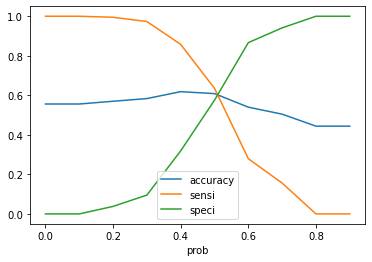

<Figure size 504x360 with 0 Axes>

In [288]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [289]:
# predicting churn with cut-off 0.525
cut_off_prob=0.3
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5342796571424018
Sensitivity/Recall : 0.9733092514549468
Specificity: 0.09525006282985675
False Positive Rate: 0.9047499371701433
Positive predictive value: 0.5739644970414202
Negative Predictive value: 0.740234375
sklearn precision score value: 0.5739644970414202


In [290]:
#Lets see how it performs on test data.
y_test_df,series_metrics= predictClassWithProb(dt_final,X_test_dt,y_test_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5263901532942511
Sensitivity/Recall : 0.9683921209344938
Specificity: 0.08438818565400844
False Positive Rate: 0.9156118143459916
Positive predictive value: 0.581888246628131
Negative Predictive value: 0.6698564593301436
sklearn precision score value: 0.581888246628131


# 3. Random Forest

In [292]:
# Creating Train-Test variables for Random Forest
X_train_rf = pd.DataFrame(X_train_pca)
y_train_rf = pd.DataFrame(y_train)
X_test_rf = pd.DataFrame(X_test_pca)
y_test_rf = y_test

In [293]:
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20, oob_score=True)

In [294]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [295]:
rf.oob_score_

0.5922785092613256

In [297]:
# make predictions
pred_probs_test = rf.predict(X_test_rf)

#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_rf,pred_Class=pred_probs_test)

Roc_auc_score : 0.564271231724568
Sensitivity/Recall : 0.8506642235455795
Specificity: 0.27787823990355637
False Positive Rate: 0.7221217600964437
Positive predictive value: 0.6078559738134206
Negative Predictive value: 0.5857687420584498
sklearn precision score value: 0.6078559738134206


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                  0.85
Specificity                  0.28
FPR                          0.72
Positive predictive value    0.61
Negative Predictive value    0.59
Precision                    0.61
dtype: object

In [302]:
parameters = {'max_depth': range(5, 40, 5)}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters, cv=10, scoring="accuracy", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10; 1/7] START max_depth=5................................................
[CV 1/10; 1/7] END ..............................max_depth=5; total time=   0.8s
[CV 2/10; 1/7] START max_depth=5................................................
[CV 2/10; 1/7] END ..............................max_depth=5; total time=   0.8s
[CV 3/10; 1/7] START max_depth=5................................................
[CV 3/10; 1/7] END ..............................max_depth=5; total time=   0.8s
[CV 4/10; 1/7] START max_depth=5................................................
[CV 4/10; 1/7] END ..............................max_depth=5; total time=   0.7s
[CV 5/10; 1/7] START max_depth=5................................................
[CV 5/10; 1/7] END ..............................max_depth=5; total time=   0.7s
[CV 6/10; 1/7] START max_depth=5................................................
[CV 6/10; 1/7] END .............................

[CV 1/10; 6/7] END .............................max_depth=30; total time=   2.0s
[CV 2/10; 6/7] START max_depth=30...............................................
[CV 2/10; 6/7] END .............................max_depth=30; total time=   1.9s
[CV 3/10; 6/7] START max_depth=30...............................................
[CV 3/10; 6/7] END .............................max_depth=30; total time=   1.9s
[CV 4/10; 6/7] START max_depth=30...............................................
[CV 4/10; 6/7] END .............................max_depth=30; total time=   2.0s
[CV 5/10; 6/7] START max_depth=30...............................................
[CV 5/10; 6/7] END .............................max_depth=30; total time=   1.9s
[CV 6/10; 6/7] START max_depth=30...............................................
[CV 6/10; 6/7] END .............................max_depth=30; total time=   2.0s
[CV 7/10; 6/7] START max_depth=30...............................................
[CV 7/10; 6/7] END .........

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 40, 5)}, return_train_score=True,
             scoring='accuracy', verbose=1000)

In [303]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,1.264969,0.021021,0.013043,0.000602,10,{'max_depth': 10},0.622074,0.625418,0.583705,0.602679,...,0.759856,0.759732,0.767171,0.767047,0.762832,0.767047,0.759236,0.764939,0.764661,0.003903
0,0.747248,0.022543,0.009570,0.000238,5,{'max_depth': 5},0.617614,0.598662,0.594866,0.620536,...,0.634267,0.627820,0.628812,0.624597,0.633275,0.632408,0.621250,0.626829,0.628171,0.004002
2,1.654859,0.023941,0.016042,0.000522,15,{'max_depth': 15},0.593088,0.594203,0.585938,0.601562,...,0.929829,0.931937,0.938879,0.930325,0.930201,0.932432,0.930697,0.936772,0.932356,0.003752
5,1.943844,0.040388,0.019464,0.000361,30,{'max_depth': 30},0.576366,0.578595,0.573661,0.585938,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,1.853858,0.041635,0.018503,0.000739,20,{'max_depth': 20},0.584169,0.578595,0.578125,0.588170,...,0.994669,0.994297,0.994669,0.993801,0.995413,0.995165,0.991818,0.995289,0.994210,0.001195
6,1.956399,0.034536,0.019582,0.000305,35,{'max_depth': 35},0.583055,0.570792,0.572545,0.591518,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.912622,0.034902,0.019143,0.000408,25,{'max_depth': 25},0.574136,0.571906,0.574777,0.594866,...,0.999876,0.999752,0.999752,0.999628,0.999752,1.000000,0.999876,0.999876,0.999777,0.000121


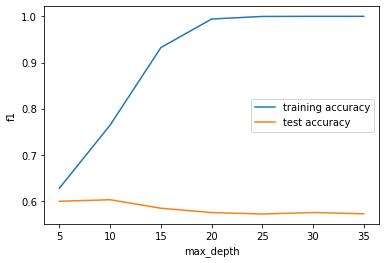

In [304]:
# grid_search.cv_results_

plot_traintestAcc(grid_search.cv_results_,'max_depth')

In [305]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer